 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [17]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy of the model: 87.75%


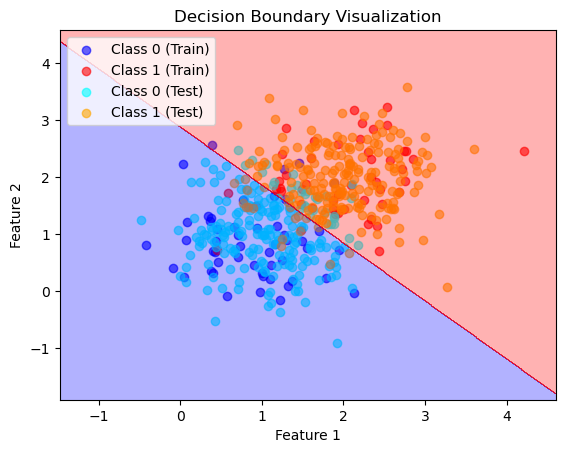

Accuracy of the model with -1/+1 labels: 87.75%


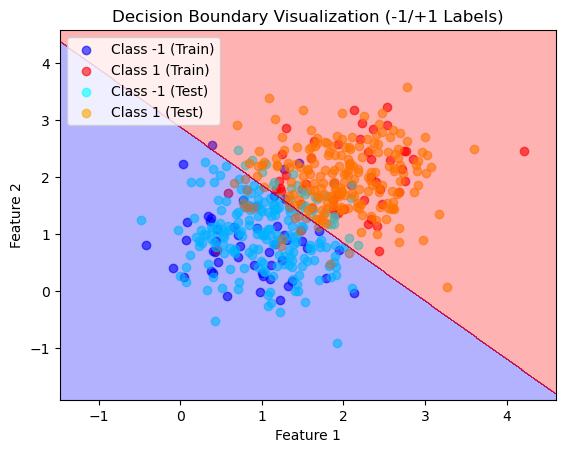

Accuracy with 0/1 labels: 87.75%
Accuracy with -1/+1 labels: 87.75%
Accuracy with Laplacian distribution (0/1 labels): 96.50%


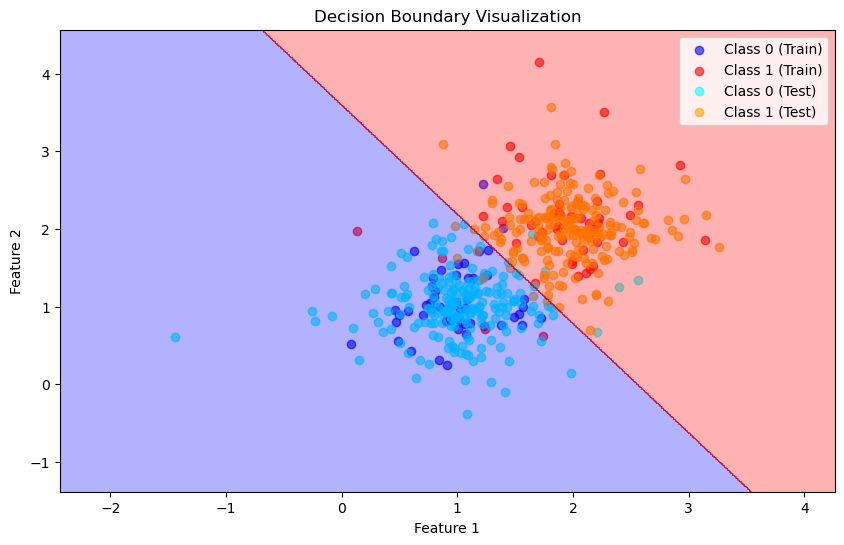

Accuracy with Laplacian distribution (-1/+1 labels): 96.50%


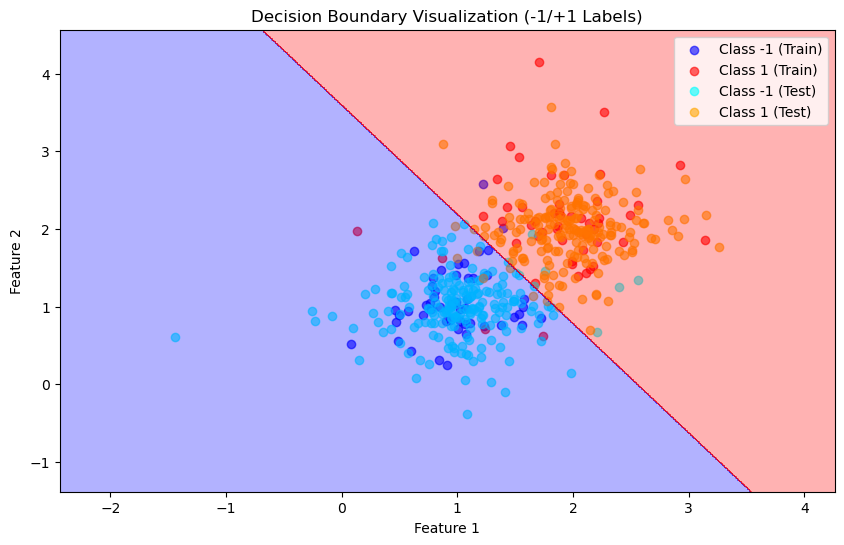


Comparison of all experiments:
Gaussian distribution (0/1 labels): 87.75%
Gaussian distribution (-1/+1 labels): 87.75%
Laplacian distribution (0/1 labels): 96.50%
Laplacian distribution (-1/+1 labels): 96.50%


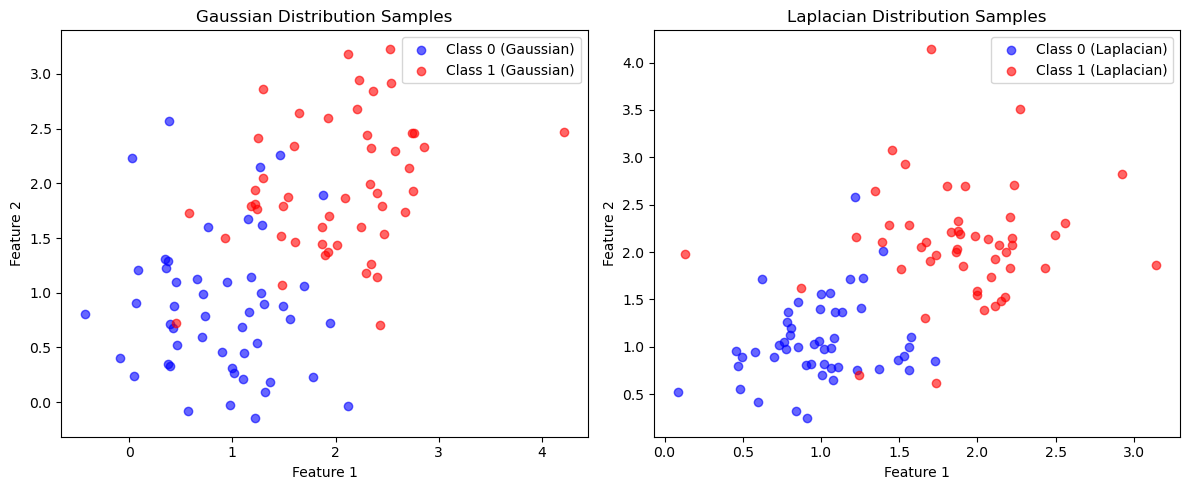

In [18]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =     np.random.multivariate_normal(mean1,cov,50);        #Class1 training data
class2_tr =     np.random.multivariate_normal(mean2,cov,50)         #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels
    # Compute the weight vector using the pseudo-inverse solution
    X_train_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    w = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Predict the labels of test data using the weight vector
    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
    Y_pred = X_test_aug @ w >= 0.5  # Threshold at 0.5 for binary classification

    # Return the predicted test labels
    return Y_pred.astype(int)
#Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)


##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    accuracy = np.mean(Y_test == Y_pred) * 100  # Calculate accuracy as a percentage

    #Return the accuracy
    return accuracy
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print(f"Accuracy of the model: {accuracy:.2f}%")  # Print the accuracy

##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
# Visualize the decision boundary
def plot_decision_boundary(X_train, Y_train, X_test, Y_test, predictions):
    # Plot the training data
    plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], color='blue', label='Class 0 (Train)', alpha=0.6)
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='red', label='Class 1 (Train)', alpha=0.6)

    # Plot the testing data
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], color='cyan', label='Class 0 (Test)', alpha=0.6)
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='orange', label='Class 1 (Test)', alpha=0.6)

    # Create a mesh grid for decision boundary
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid
    grid_aug = np.hstack((np.ones((grid.shape[0], 1)), grid))  # Add bias term
    w = np.linalg.pinv(np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T @ np.hstack((np.ones((X_train.shape[0], 1)), X_train))) @ np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T @ Y_train
    Z = (grid_aug @ w >= 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
    plt.legend()
    plt.title("Decision Boundary Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(tr_data, tr_targets, te_data, te_targets, predictions)
##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
# Change target label notation from 0/1 to -1/+1
tr_targets_new = 2 * tr_targets - 1  # Convert 0->-1 and 1->+1
te_targets_new = 2 * te_targets - 1  # Convert 0->-1 and 1->+1

# Define a modified LS_Classify function for -1/+1 target labels
def LS_Classify_mod(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels(-1/+1), and Testing data
    #Outputs: Testing labels
    # Compute the weight vector using the pseudo-inverse solution
    X_train_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    w = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ Y_train

    # Predict the labels of test data using the weight vector
    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
    Y_pred = X_test_aug @ w >= 0  # Threshold at 0 for -1/+1 classification
    Y_pred = 2 * Y_pred.astype(int) - 1  # Convert 0/1 to -1/+1

    # Return the predicted test labels
    return Y_pred

# Get the test data predictions using -1/+1 notation
predictions_new = LS_Classify_mod(tr_data, tr_targets_new, te_data)

# Calculate and print accuracy
accuracy_new = np.mean(te_targets_new == predictions_new) * 100
print(f"Accuracy of the model with -1/+1 labels: {accuracy_new:.2f}%")

# Visualize the decision boundary with -1/+1 labels
def plot_decision_boundary_mod(X_train, Y_train, X_test, Y_test, predictions):
    # Plot the training data
    plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', label='Class -1 (Train)', alpha=0.6)
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='red', label='Class 1 (Train)', alpha=0.6)

    # Plot the testing data
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='cyan', label='Class -1 (Test)', alpha=0.6)
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='orange', label='Class 1 (Test)', alpha=0.6)

    # Create a mesh grid for decision boundary
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid
    grid_aug = np.hstack((np.ones((grid.shape[0], 1)), grid))  # Add bias term
    w = np.linalg.pinv(np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T @ np.hstack((np.ones((X_train.shape[0], 1)), X_train))) @ np.hstack((np.ones((X_train.shape[0], 1)), X_train)).T @ Y_train
    Z = (grid_aug @ w >= 0).astype(int)
    Z = 2 * Z - 1  # Convert 0/1 to -1/+1
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
    plt.legend()
    plt.title("Decision Boundary Visualization (-1/+1 Labels)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary_mod(tr_data, tr_targets_new, te_data, te_targets_new, predictions_new)

# Compare results of 0/1 and -1/+1 notations
print(f"Accuracy with 0/1 labels: {accuracy:.2f}%")
print(f"Accuracy with -1/+1 labels: {accuracy_new:.2f}%")







##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
# Function to generate samples from a multivariate Laplacian distribution
def generate_multivariate_laplacian(mean, scale, size):
    # Generate independent Laplacian random variables
    dim = len(mean)
    samples = np.zeros((size, dim))
    
    for i in range(dim):
        # Generate Laplacian samples using the difference of two exponential random variables
        samples[:, i] = np.random.laplace(loc=mean[i], scale=scale, size=size)
    
    return samples

# Set the parameters for Laplacian distribution
mean1_lap = [1, 1]  # Mean of class1
mean2_lap = [2, 2]  # Mean of class2
scale_lap = 0.3     # Scale parameter (analogous to standard deviation)

# Generate training data from Laplacian distribution
class1_tr_lap = generate_multivariate_laplacian(mean1_lap, scale_lap, 50)
class2_tr_lap = generate_multivariate_laplacian(mean2_lap, scale_lap, 50)
tr_data_lap = np.vstack((class1_tr_lap, class2_tr_lap))
tr_targets_lap = np.hstack((np.zeros(50), np.ones(50)))  # 0/1 labels

# Generate testing data from Laplacian distribution
class1_te_lap = generate_multivariate_laplacian(mean1_lap, scale_lap, 200)
class2_te_lap = generate_multivariate_laplacian(mean2_lap, scale_lap, 200)
te_data_lap = np.vstack((class1_te_lap, class2_te_lap))
te_targets_lap = np.hstack((np.zeros(200), np.ones(200)))  # 0/1 labels

# Apply least squares classification to Laplacian data
predictions_lap = LS_Classify(tr_data_lap, tr_targets_lap, te_data_lap)
accuracy_lap = LS_Classify_Accuracy(te_targets_lap, predictions_lap)
print(f"Accuracy with Laplacian distribution (0/1 labels): {accuracy_lap:.2f}%")

# Visualize the decision boundary for Laplacian data
plt.figure(figsize=(10, 6))
plot_decision_boundary(tr_data_lap, tr_targets_lap, te_data_lap, te_targets_lap, predictions_lap)

# Convert to -1/+1 labels for Laplacian data
tr_targets_lap_new = 2 * tr_targets_lap - 1  # Convert 0->-1 and 1->+1
te_targets_lap_new = 2 * te_targets_lap - 1  # Convert 0->-1 and 1->+1

# Apply least squares classification with -1/+1 labels
predictions_lap_new = LS_Classify_mod(tr_data_lap, tr_targets_lap_new, te_data_lap)
accuracy_lap_new = np.mean(te_targets_lap_new == predictions_lap_new) * 100
print(f"Accuracy with Laplacian distribution (-1/+1 labels): {accuracy_lap_new:.2f}%")

# Visualize the decision boundary for Laplacian data with -1/+1 labels
plt.figure(figsize=(10, 6))
plot_decision_boundary_mod(tr_data_lap, tr_targets_lap_new, te_data_lap, te_targets_lap_new, predictions_lap_new)

# Compare results across all experiments
print("\nComparison of all experiments:")
print(f"Gaussian distribution (0/1 labels): {accuracy:.2f}%")
print(f"Gaussian distribution (-1/+1 labels): {accuracy_new:.2f}%")
print(f"Laplacian distribution (0/1 labels): {accuracy_lap:.2f}%")
print(f"Laplacian distribution (-1/+1 labels): {accuracy_lap_new:.2f}%")

# Visualize the data distributions
plt.figure(figsize=(12, 5))

# Gaussian distribution
plt.subplot(1, 2, 1)
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 0 (Gaussian)', alpha=0.6)
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 1 (Gaussian)', alpha=0.6)
plt.title('Gaussian Distribution Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Laplacian distribution
plt.subplot(1, 2, 2)
plt.scatter(class1_tr_lap[:, 0], class1_tr_lap[:, 1], color='blue', label='Class 0 (Laplacian)', alpha=0.6)
plt.scatter(class2_tr_lap[:, 0], class2_tr_lap[:, 1], color='red', label='Class 1 (Laplacian)', alpha=0.6)
plt.title('Laplacian Distribution Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()








<b> Report your observations </b>

1. No matter the distribution labelling as (1,0) or (-1,1) doesn't change the accuracy

2. Can get better accuracy in Laplacian Distribution






<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


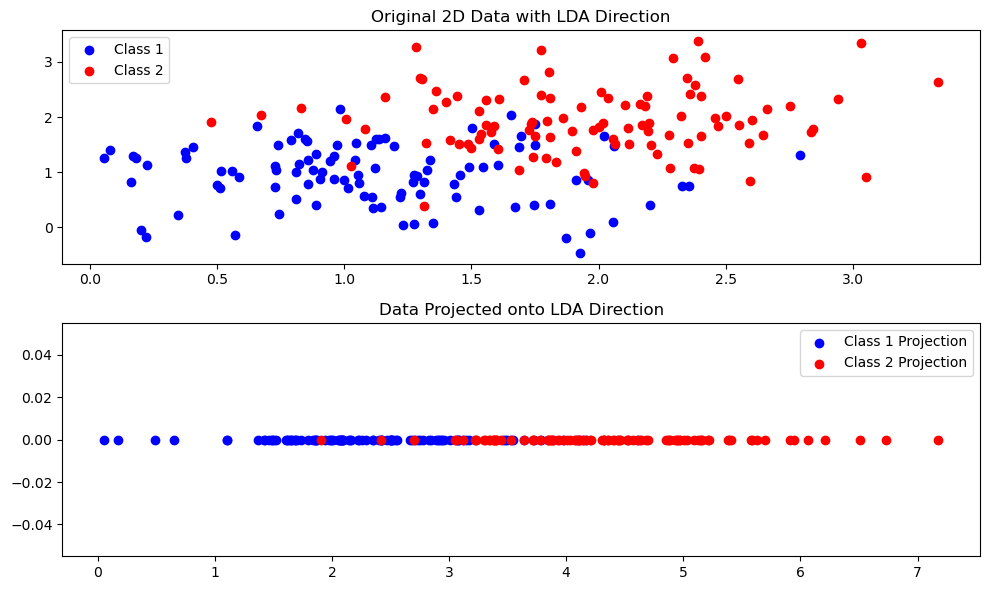

Accuracy with LDA: 83.5


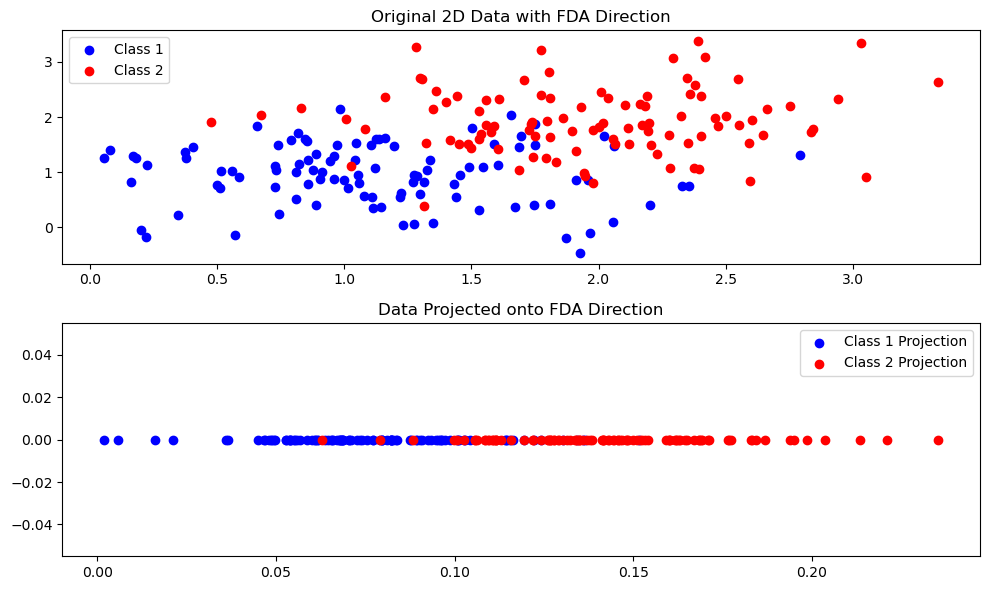

Accuracy with FDA: 83.5


In [19]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)     #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)     #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                  #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))          #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 100)    #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 100)    #Class2 testing data
te_data = np.vstack((class1_te, class2_te))                  #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(100), np.ones(100)))        #Class labels. Assign the value "0" to class1 and the value "1" to class2.



########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
  class1_idx = Y_train == 0
  class2_idx = Y_train == 1
  
  mean1 = np.mean(X_train[class1_idx], axis=0)
  mean2 = np.mean(X_train[class2_idx], axis=0)
  
  # Calculate between-class scatter matrix (Sb)
  mean_diff = (mean2 - mean1).reshape(-1, 1)
  Sb = mean_diff @ mean_diff.T
  w = (mean2 - mean1)

  #Compute the threshold
  m1_proj = np.dot(mean1, w)
  m2_proj = np.dot(mean2, w)


  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision

  threshold = (m1_proj + m2_proj) / 2
  projections = np.dot(X_test, w)
  
  # Classify based on threshold
  predictions = np.zeros(len(X_test))
  predictions[projections > threshold] = 1

  #Return weight vector and the predictions on testing data

  return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)


def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = np.dot(X_test, w)

  #Plot the projections
  plt.figure(figsize=(10, 6))
  
  # Plot original data
  plt.subplot(2, 1, 1)
  plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], c='blue', label='Class 1')
  plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='red', label='Class 2')
  plt.title('Original 2D Data with LDA Direction')
  plt.legend()
  
  # Plot projections 
  plt.subplot(2, 1, 2)
  plt.scatter(projections[Y_test == 0], np.zeros(np.sum(Y_test == 0)), c='blue', label='Class 1 Projection')
  plt.scatter(projections[Y_test == 1], np.zeros(np.sum(Y_test == 1)), c='red', label='Class 2 Projection')
  plt.title('Data Projected onto LDA Direction')
  plt.legend()
  
  plt.tight_layout()
  plt.show()


LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc*100)


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions
  class1_idx = Y_train == 0
  class2_idx = Y_train == 1
  
  mean1 = np.mean(X_train[class1_idx], axis=0)
  mean2 = np.mean(X_train[class2_idx], axis=0)
  
  # Calculate between-class scatter matrix (Sb)
  mean_diff = (mean2 - mean1).reshape(-1, 1)
  Sb = mean_diff @ mean_diff.T
  
  # Calculate within-class scatter matrix (Sw)
  class1_data = X_train[class1_idx]
  class2_data = X_train[class2_idx]
  
  Sw1 = np.zeros((X_train.shape[1], X_train.shape[1]))
  for x in class1_data:
    diff = (x - mean1).reshape(-1, 1)
    Sw1 += diff @ diff.T
    
  Sw2 = np.zeros((X_train.shape[1], X_train.shape[1]))
  for x in class2_data:
    diff = (x - mean2).reshape(-1, 1)
    Sw2 += diff @ diff.T
  
  Sw = Sw1 + Sw2
  
  # Compute FDA weight vector: w = inv(Sw) @ (mean2 - mean1)
  w = np.linalg.inv(Sw) @ (mean2 - mean1)

  #Compute the threshold
  # Project class means
  m1_proj = np.dot(mean1, w)
  m2_proj = np.dot(mean2, w)
  
  # Set threshold as the midpoint between projected means
  threshold = (m1_proj + m2_proj) / 2

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  # Project test data
  projections = np.dot(X_test, w)
  
  # Classify based on threshold
  predictions = np.zeros(len(X_test))
  predictions[projections > threshold] = 1



  #Return weight vector and the predictions on testing data

  return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)


def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  projections = np.dot(X_test, w)

  #Plot the projections
  plt.figure(figsize=(10, 6))
  
  # Plot original data
  plt.subplot(2, 1, 1)
  plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], c='blue', label='Class 1')
  plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='red', label='Class 2')
  plt.title('Original 2D Data with FDA Direction')
  plt.legend()
  
  # Plot projections 
  plt.subplot(2, 1, 2)
  plt.scatter(projections[Y_test == 0], np.zeros(np.sum(Y_test == 0)), c='blue', label='Class 1 Projection')
  plt.scatter(projections[Y_test == 1], np.zeros(np.sum(Y_test == 1)), c='red', label='Class 2 Projection')
  plt.title('Data Projected onto FDA Direction')
  plt.legend()
  
  plt.tight_layout()
  plt.show()



FDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix
  # Get number of classes
  classes = np.unique(Y_train)
  num_classes = len(classes)
  
  # Compute overall mean
  mean_overall = np.mean(X_train, axis=0)
  
  # Calculate between-class scatter matrix (Sb)
  Sb = np.zeros((X_train.shape[1], X_train.shape[1]))
  
  # Calculate within-class scatter matrix (Sw)
  Sw = np.zeros((X_train.shape[1], X_train.shape[1]))
  
  for c in classes:
    # Get data points for this class
    class_data = X_train[Y_train == c]
    
    # Compute class mean
    class_mean = np.mean(class_data, axis=0)
    
    # Update between-class scatter
    n_samples = len(class_data)
    mean_diff = (class_mean - mean_overall).reshape(-1, 1)
    Sb += n_samples * (mean_diff @ mean_diff.T)
    
    # Compute within-class scatter for this class
    for x in class_data:
      diff = (x - class_mean).reshape(-1, 1)
      Sw += diff @ diff.T
  
  # Solve the generalized eigenvalue problem: Sb*w = lambda*Sw*w
  # This is equivalent to inv(Sw)*Sb*w = lambda*w
  try:
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)
  except np.linalg.LinAlgError:
    # If Sw is singular, use pseudoinverse
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)
  
  # Sort eigenvectors by decreasing eigenvalues
  idx = eigenvalues.argsort()[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]
  
  # Select k eigenvectors with largest eigenvalues
  w = eigenvectors[:, :k]
  
  # Ensure w is real (eigendecomposition may return complex numbers)
  w = np.real(w)

  #Compute and return the projection matrix
  return w






<b> Report your observations </b>

1. LDA and FDA give nearly the same accuracies here since it is a shared covariance matrix and LDA uses only between-class covariance matrix 

2. The projection is along the line connecting the means.

3. I have done only 1D projections in LDA and FDA



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


Perceptron accuracy: 82.50%


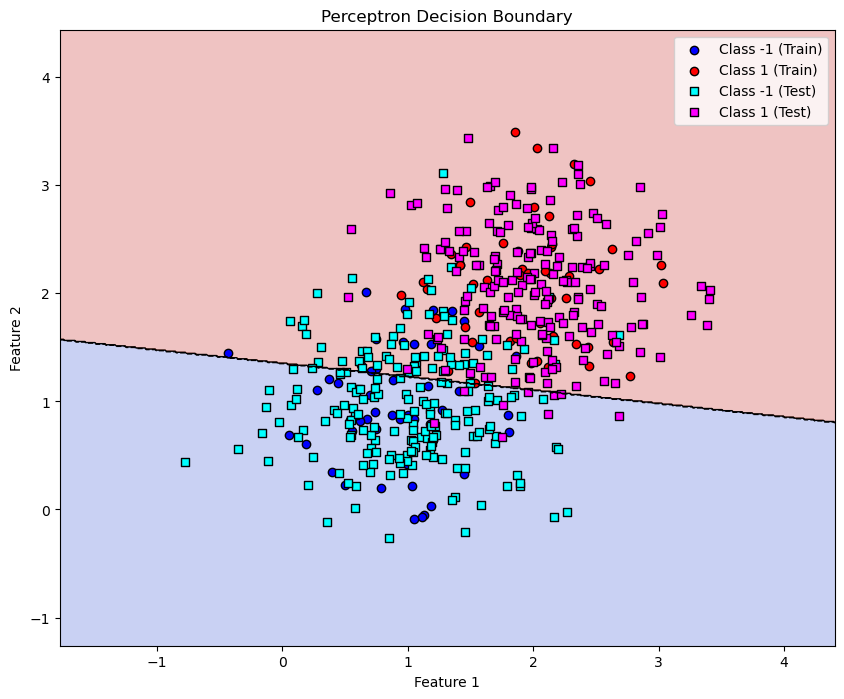

Least Squares accuracy: 91.00%


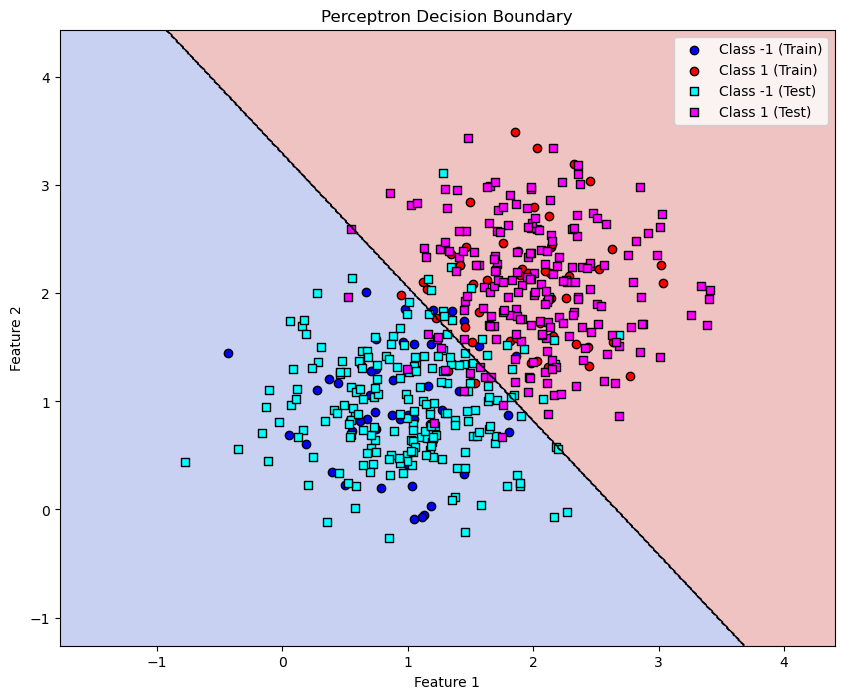

Perceptron accuracy with outliers: 82.50%
Least Squares accuracy with outliers: 89.75%


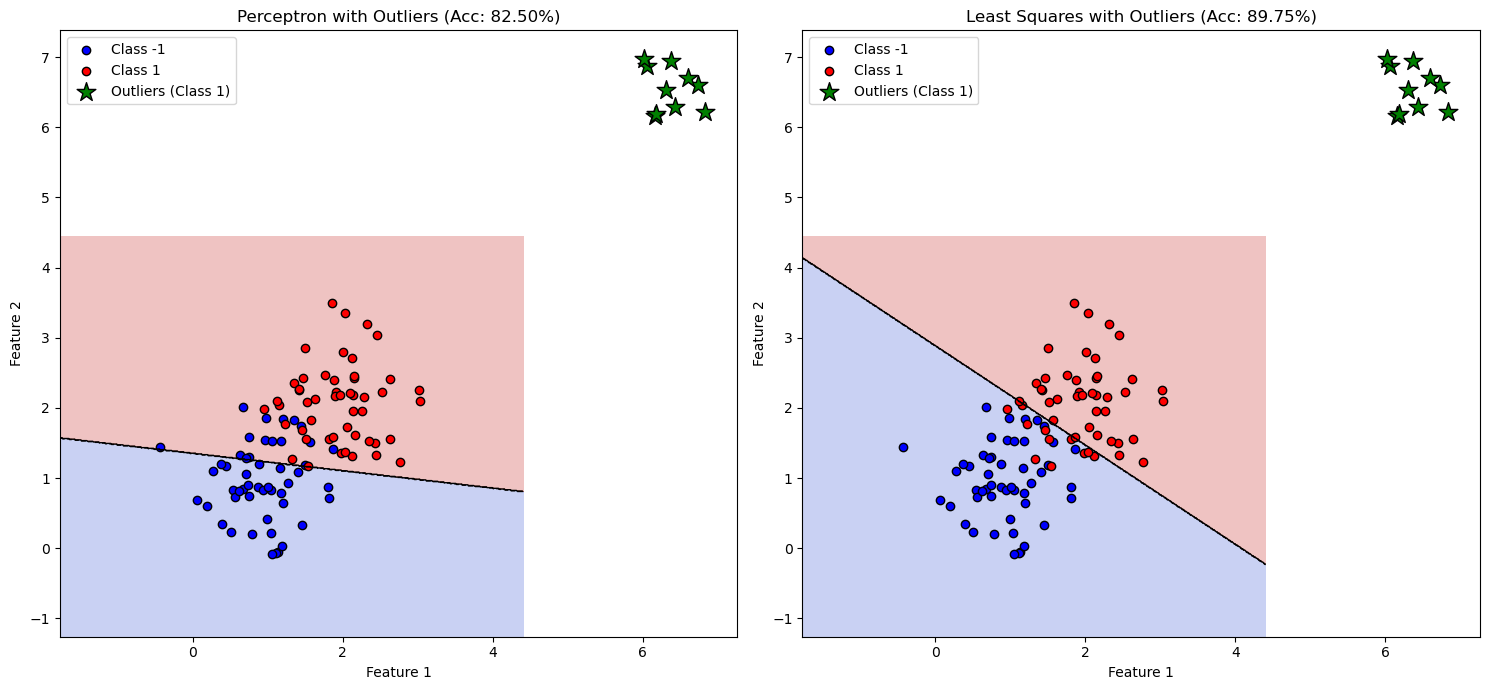

Perceptron accuracy on XOR problem: 38.54%


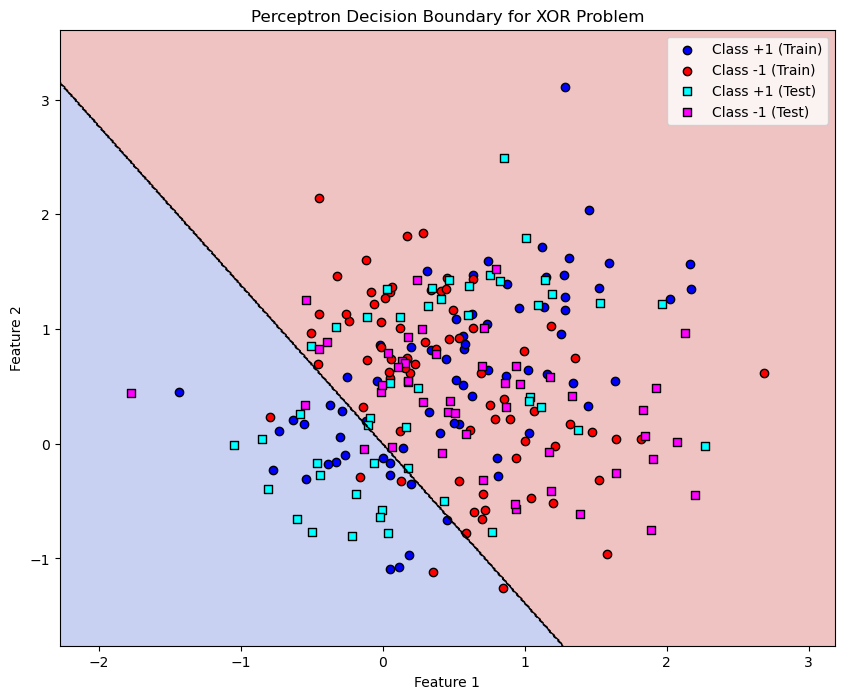

In [20]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2
np.random.seed(42)  # For reproducibility
#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)             #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))               #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Convert labels to -1 and 1 for perceptron
tr_targets_perceptron = 2*tr_targets - 1  # 0 -> -1, 1 -> 1

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)             #Class2 testing data
te_data = np.vstack((class1_te, class2_te))               #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Convert labels to -1 and 1 for perceptron
te_targets_perceptron = 2*te_targets - 1  # 0 -> -1, 1 -> 1


########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 100     #Number of epochs
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))          #Data. Append ones to the training data to take care of the bias
    w = np.zeros(X.shape[1])          #Initialize the weight vector
    
    for epoch in range(0, epochs, 1):
        misclassified = 0
        for i in range(X.shape[0]):
            #Compute the predictions
            y_pred = np.sign(np.dot(X[i], w))
            
            #Compute the error
            if y_pred != Y_train[i]:
                #Update the weight vector
                w = w + Y_train[i] * X[i]
                misclassified += 1
        
        # Check if all points are correctly classified
        if misclassified == 0:
            print(f"Perceptron converged after {epoch+1} epochs")
            break
    
    #Compute the test data predicitions using the final weight vector
    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(np.dot(X_test_aug, w))

    #Return the test data predictions and the final weight vector
    return predictions, w

# Train perceptron on the data
predictions, w = Perceptron(tr_data, tr_targets_perceptron, te_data)

# Convert predictions back to 0 and 1 for evaluation
predictions_01 = (predictions + 1) / 2

# Calculate accuracy
accuracy = np.mean(predictions_01 == te_targets) * 100
print(f"Perceptron accuracy: {accuracy:.2f}%")


##########################################
#Plot the decision boundary using perceptron
##########################################
def plot_decision_boundary_perceptron(X_train, Y_train, X_test, Y_test, w):
    # Create a meshgrid
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Compute the decision function for each point in the meshgrid
    Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
    Z = np.sign(Z).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', linewidths=1, levels=[-1, 0, 1])
    
    # Plot the data points
    plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], 
                c='blue', marker='o', edgecolors='k', label='Class -1 (Train)')
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 
                c='red', marker='o', edgecolors='k', label='Class 1 (Train)')
    
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], 
                c='cyan', marker='s', edgecolors='k', label='Class -1 (Test)')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], 
                c='magenta', marker='s', edgecolors='k', label='Class 1 (Test)')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary_perceptron(tr_data, tr_targets_perceptron, te_data, te_targets_perceptron, w)


##########################################
#Plot the decision boundary using least squares
##########################################
def LS_Classify(X_train, Y_train, X_test):
    # Add bias term
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Compute weights using normal equation
    try:
        w = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train
    except np.linalg.LinAlgError:
        # Add regularization if matrix is singular
        w = np.linalg.inv(X_train_bias.T @ X_train_bias + 1e-5 * np.eye(X_train_bias.shape[1])) @ X_train_bias.T @ Y_train
    
    # Compute predictions
    y_pred = X_test_bias @ w
    
    # Convert to binary predictions
    predictions = np.sign(y_pred)
    
    return predictions, w

# Train least squares on the data
predictions_ls, w_ls = LS_Classify(tr_data, tr_targets_perceptron, te_data)

# Calculate accuracy
accuracy_ls = np.mean(predictions_ls == te_targets_perceptron) * 100
print(f"Least Squares accuracy: {accuracy_ls:.2f}%")

# Plot the decision boundary for least squares
plot_decision_boundary_perceptron(tr_data, tr_targets_perceptron, te_data, te_targets_perceptron, w_ls)


##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################
# Create dataset with outliers
np.random.seed(42)  # For reproducibility
outliers = np.random.uniform(low=[6, 6], high=[7, 7], size=(10, 2))
tr_data_with_outliers = np.vstack((tr_data, outliers))
tr_targets_with_outliers = np.hstack((tr_targets, np.ones(10)))  # Assign outliers to class 1
tr_targets_perceptron_with_outliers = 2*tr_targets_with_outliers - 1  # Convert to -1 and 1

# Train perceptron on data with outliers
predictions_outliers, w_outliers = Perceptron(tr_data_with_outliers, tr_targets_perceptron_with_outliers, te_data)

# Convert predictions back to 0 and 1 for evaluation
predictions_outliers_01 = (predictions_outliers + 1) / 2

# Calculate accuracy
accuracy_outliers = np.mean(predictions_outliers_01 == te_targets) * 100
print(f"Perceptron accuracy with outliers: {accuracy_outliers:.2f}%")

# Train least squares on data with outliers
predictions_ls_outliers, w_ls_outliers = LS_Classify(tr_data_with_outliers, tr_targets_perceptron_with_outliers, te_data)

# Calculate accuracy
accuracy_ls_outliers = np.mean(predictions_ls_outliers == te_targets_perceptron) * 100
print(f"Least Squares accuracy with outliers: {accuracy_ls_outliers:.2f}%")

# Plot both decision boundaries for comparison
plt.figure(figsize=(15, 7))

# Perceptron with outliers
plt.subplot(1, 2, 1)
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w_outliers
Z = np.sign(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linewidths=1, levels=[-1, 0, 1])

plt.scatter(tr_data[tr_targets_perceptron == -1][:, 0], tr_data[tr_targets_perceptron == -1][:, 1], 
            c='blue', marker='o', edgecolors='k', label='Class -1')
plt.scatter(tr_data[tr_targets_perceptron == 1][:, 0], tr_data[tr_targets_perceptron == 1][:, 1], 
            c='red', marker='o', edgecolors='k', label='Class 1')
plt.scatter(outliers[:, 0], outliers[:, 1], 
            c='green', marker='*', s=200, edgecolors='k', label='Outliers (Class 1)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron with Outliers (Acc: {accuracy_outliers:.2f}%)')
plt.legend()

# Least Squares with outliers
plt.subplot(1, 2, 2)
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w_ls_outliers
Z = np.sign(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linewidths=1, levels=[-1, 0, 1])

plt.scatter(tr_data[tr_targets_perceptron == -1][:, 0], tr_data[tr_targets_perceptron == -1][:, 1], 
            c='blue', marker='o', edgecolors='k', label='Class -1')
plt.scatter(tr_data[tr_targets_perceptron == 1][:, 0], tr_data[tr_targets_perceptron == 1][:, 1], 
            c='red', marker='o', edgecolors='k', label='Class 1')
plt.scatter(outliers[:, 0], outliers[:, 1], 
            c='green', marker='*', s=200, edgecolors='k', label='Outliers (Class 1)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Least Squares with Outliers (Acc: {accuracy_ls_outliers:.2f}%)')
plt.legend()

plt.tight_layout()
plt.show()

##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0, 0]      #Mean of Gaussian1
class1_mean2 = [1, 1]      #Mean of Gaussian3
class2_mean1 = [0, 1]      #Mean of Gaussian2
class2_mean2 = [1, 0]      #Mean of Gaussian4
cov = [[0.3, 0], [0, 0.3]]   #Covariance matrix. Same covariance for class1 and class2

#Generate data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

#Obtain 2-class dataset
class1_data = np.vstack((class1_data1, class1_data2))
class2_data = np.vstack((class2_data1, class2_data2))
all_data = np.vstack((class1_data, class2_data))
all_labels = np.hstack((np.ones(120), -np.ones(120)))  # +1 for class 1, -1 for class 2

#Create train test splits
# Shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(all_data))
split = int(0.6 * len(all_data))  # 60% for training

train_data = all_data[indices[:split]]
train_labels = all_labels[indices[:split]]
test_data = all_data[indices[split:]]
test_labels = all_labels[indices[split:]]

#Classify this dataset using perceptron algorithm
xor_predictions, xor_w = Perceptron(train_data, train_labels, test_data)

# Calculate accuracy
xor_accuracy = np.mean(xor_predictions == test_labels) * 100
print(f"Perceptron accuracy on XOR problem: {xor_accuracy:.2f}%")

#Plot the decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid
x_min, x_max = all_data[:, 0].min() - 0.5, all_data[:, 0].max() + 0.5
y_min, y_max = all_data[:, 1].min() - 0.5, all_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Compute the decision function for each point in the meshgrid
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ xor_w
Z = np.sign(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linewidths=1, levels=[-1, 0, 1])

# Plot the training data
plt.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], 
            c='blue', marker='o', edgecolors='k', label='Class +1 (Train)')
plt.scatter(train_data[train_labels == -1][:, 0], train_data[train_labels == -1][:, 1], 
            c='red', marker='o', edgecolors='k', label='Class -1 (Train)')

# Plot the test data
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], 
            c='cyan', marker='s', edgecolors='k', label='Class +1 (Test)')
plt.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], 
            c='magenta', marker='s', edgecolors='k', label='Class -1 (Test)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary for XOR Problem')
plt.legend()
plt.show()

<b> Report your observations </b>

1. Perceptron just tries to find a decision boundary but not to minimiza the errors, so we cannot guarantee perceptron getting better accuracy than least squares.

2. Perceptron performs very poorly on XOR problem since it's not a linearly separable data and perceptron works only on linearly separable data

3. After attaching the outliers, the accuracy of perceptron doesnt decrease while the accuracy of least squares decreases. This implies the robustness of perceptron while handling outliers.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




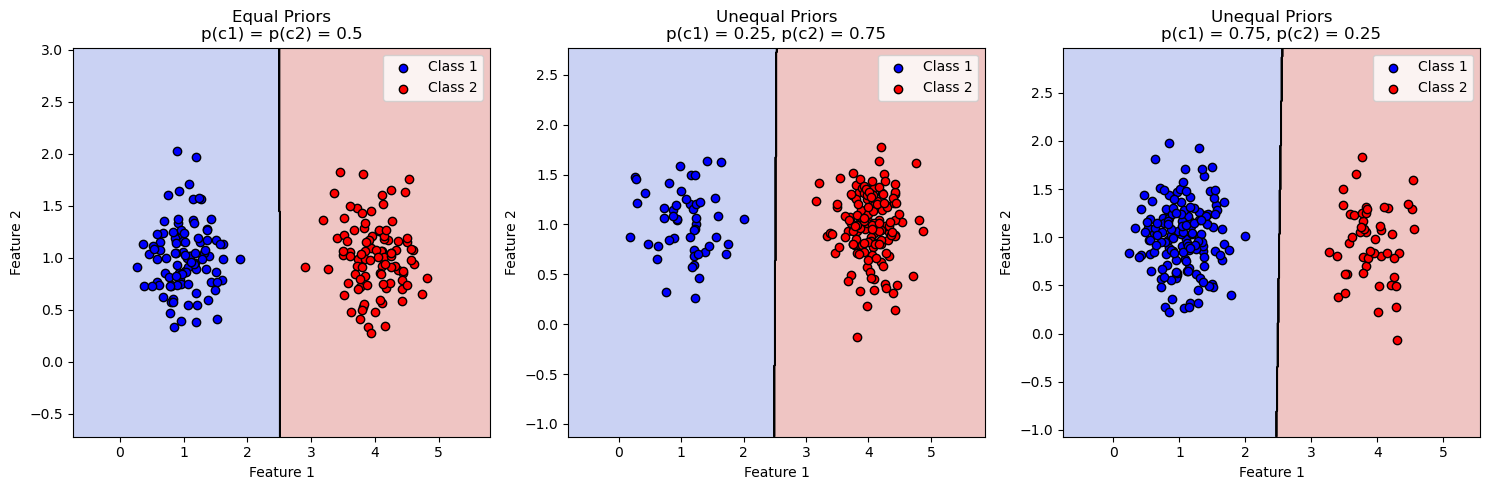

Decision boundary parameters (Case 1): [-74.85824972  29.78869946   0.12388152]
Decision boundary parameters (Case 2): [-74.07194859  29.62481416  -0.28290516]
Decision boundary parameters (Case 3): [-71.43922838  28.6517093   -0.62349369]


In [21]:
##########################################
#Part-4a)-0: Data Generation
# Set the parameters for the Gaussian distributions
m1 = np.array([1, 1])  # Mean of class 1
m2 = np.array([4, 1])  # Mean of class 2
cov = np.array([[0.1, 0], [0, 0.1]])  # Same covariance matrix for both classes

# Case 1: Equal priors - 100 samples from each class
class1_case1 = np.random.multivariate_normal(m1, cov, 100)
class2_case1 = np.random.multivariate_normal(m2, cov, 100)
data_case1 = np.vstack((class1_case1, class2_case1))
labels_case1 = np.hstack((np.zeros(100), np.ones(100)))

# Case 2: Unequal priors - 50 samples from class1 and 150 samples from class2
class1_case2 = np.random.multivariate_normal(m1, cov, 50)
class2_case2 = np.random.multivariate_normal(m2, cov, 150)
data_case2 = np.vstack((class1_case2, class2_case2))
labels_case2 = np.hstack((np.zeros(50), np.ones(150)))

# Case 3: Unequal priors - 150 samples from class1 and 50 samples from class2
class1_case3 = np.random.multivariate_normal(m1, cov, 150)
class2_case3 = np.random.multivariate_normal(m2, cov, 50)
data_case3 = np.vstack((class1_case3, class2_case3))
labels_case3 = np.hstack((np.zeros(150), np.ones(50)))

# Complete the decision boundary function
def decisionBoundary(X_train, Y_train):
    # Inputs: Training data and Training labels
    # Outputs: Decision boundary parameters, i.e., w0, w
    
    # Calculate prior probabilities
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1.0 - p_c1

    # Calculate mean vectors for each class
    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)
    
    # Use the same covariance matrix for both classes
    cov1 = cov
    cov2 = cov
    
    # For shared covariance case, the decision boundary is linear
    # w = Σ^(-1)(μ2 - μ1)
    w = np.linalg.inv(cov).dot(mean_2 - mean_1)
    
    # w0 includes the prior terms and constant terms
    w0 = -0.5 * mean_2.T.dot(np.linalg.inv(cov)).dot(mean_2) + 0.5 * mean_1.T.dot(np.linalg.inv(cov)).dot(mean_1) + np.log(p_c2/p_c1)
    
    return np.array([w0] + list(w))

# Function to plot decision regions
def plot_decision_regions(data, labels, params, title):
    # Create a meshgrid to visualize decision boundary
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Get decision values for all points in the meshgrid
    Z = params[0] + params[1] * xx + params[2] * yy
    Z = (Z > 0).astype(int)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', linewidths=1)
    
    # Plot the data points
    plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
    plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], c='red', edgecolors='k', label='Class 2')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

# Plot all three cases
plt.figure(figsize=(15, 5))

# Case 1: Equal priors
plt.subplot(1, 3, 1)
params_case1 = decisionBoundary(data_case1, labels_case1)
plot_decision_regions(data_case1, labels_case1, params_case1, 'Equal Priors\np(c1) = p(c2) = 0.5')

# Case 2: Unequal priors - p(c1) < p(c2)
plt.subplot(1, 3, 2)
params_case2 = decisionBoundary(data_case2, labels_case2)
plot_decision_regions(data_case2, labels_case2, params_case2, 'Unequal Priors\np(c1) = 0.25, p(c2) = 0.75')

# Case 3: Unequal priors - p(c1) > p(c2)
plt.subplot(1, 3, 3)
params_case3 = decisionBoundary(data_case3, labels_case3)
plot_decision_regions(data_case3, labels_case3, params_case3, 'Unequal Priors\np(c1) = 0.75, p(c2) = 0.25')

plt.tight_layout()
plt.show()

# Print the decision boundary parameters for each case
print("Decision boundary parameters (Case 1):", params_case1)
print("Decision boundary parameters (Case 2):", params_case2)
print("Decision boundary parameters (Case 3):", params_case3)


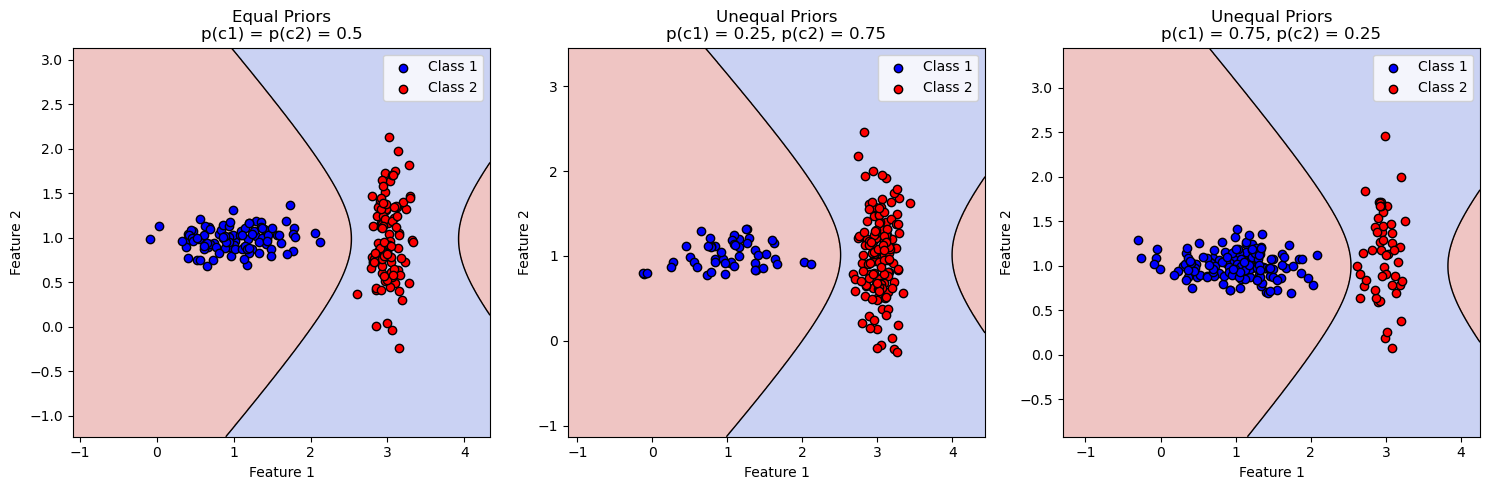

In [22]:
##########################################
#Part-4b)-0: Data Generation
##########################################
# Set the parameters for the Gaussian distributions with different covariances
m1 = np.array([1, 1])  # Mean of class 1
m2 = np.array([3, 1])  # Mean of class 2
cov1 = np.array([[0.2, 0], [0, 0.02]])  # Covariance matrix for class 1
cov2 = np.array([[0.02, 0], [0, 0.2]])  # Covariance matrix for class 2

# Case 1: Equal priors - 100 samples from each class
class1_case1 = np.random.multivariate_normal(m1, cov1, 100)
class2_case1 = np.random.multivariate_normal(m2, cov2, 100)
data_case1 = np.vstack((class1_case1, class2_case1))
labels_case1 = np.hstack((np.zeros(100), np.ones(100)))

# Case 2: Unequal priors - 50 samples from class1 and 150 samples from class2
class1_case2 = np.random.multivariate_normal(m1, cov1, 50)
class2_case2 = np.random.multivariate_normal(m2, cov2, 150)
data_case2 = np.vstack((class1_case2, class2_case2))
labels_case2 = np.hstack((np.zeros(50), np.ones(150)))

# Case 3: Unequal priors - 150 samples from class1 and 50 samples from class2
class1_case3 = np.random.multivariate_normal(m1, cov1, 150)
class2_case3 = np.random.multivariate_normal(m2, cov2, 50)
data_case3 = np.vstack((class1_case3, class2_case3))
labels_case3 = np.hstack((np.zeros(150), np.ones(50)))

# Define the quadratic decision boundary function
def decisionBoundary(X_train, Y_train):
    # Calculate prior probabilities
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1.0 - p_c1

    # Calculate mean vectors for each class
    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)
    
    # Use the different covariance matrices for each class
    cov_1 = cov1
    cov_2 = cov2
    
    # For different covariance matrices, we get a quadratic decision boundary
    # Compute the inverses and determinants
    inv_cov1 = np.linalg.inv(cov_1)
    inv_cov2 = np.linalg.inv(cov_2)
    det_cov1 = np.linalg.det(cov_1)
    det_cov2 = np.linalg.det(cov_2)
    
    # Return the parameters needed for plotting the quadratic decision boundary
    return mean_1, mean_2, inv_cov1, inv_cov2, det_cov1, det_cov2, p_c1, p_c2

# Function to plot decision regions with quadratic boundary
def plot_quadratic_decision_regions(data, labels, title):
    # Get the decision boundary parameters
    mean_1, mean_2, inv_cov1, inv_cov2, det_cov1, det_cov2, p_c1, p_c2 = decisionBoundary(data, labels)
    
    # Create a meshgrid to visualize decision boundary
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # For each point in the meshgrid, compute the discriminant function
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.zeros(mesh_points.shape[0])
    
    for i, point in enumerate(mesh_points):
        # Compute the discriminant function for the quadratic boundary
        term1 = -0.5 * np.log(det_cov1/det_cov2)
        term2 = -0.5 * (point - mean_1).T.dot(inv_cov1).dot(point - mean_1)
        term3 = 0.5 * (point - mean_2).T.dot(inv_cov2).dot(point - mean_2)
        term4 = np.log(p_c1/p_c2)
        Z[i] = term1 + term2 + term3 + term4
    
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, [0], colors='k', linewidths=1)
    
    # Plot the data points
    plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
    plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], c='red', edgecolors='k', label='Class 2')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

# Plot all three cases
plt.figure(figsize=(15, 5))

# Case 1: Equal priors
plt.subplot(1, 3, 1)
plot_quadratic_decision_regions(data_case1, labels_case1, 'Equal Priors\np(c1) = p(c2) = 0.5')

# Case 2: Unequal priors - p(c1) < p(c2)
plt.subplot(1, 3, 2)
plot_quadratic_decision_regions(data_case2, labels_case2, 'Unequal Priors\np(c1) = 0.25, p(c2) = 0.75')

# Case 3: Unequal priors - p(c1) > p(c2)
plt.subplot(1, 3, 3)
plot_quadratic_decision_regions(data_case3, labels_case3, 'Unequal Priors\np(c1) = 0.75, p(c2) = 0.25')

plt.tight_layout()
plt.show()

<b> Report your observations </b>

1. In part a due to shared covariance matrix, the decision boundary is linear whereas in part b, the different covariance matrices results in a non linear decision boundary.

2. Equal priors imply the decision boundary is halway between the classes and with increasing probability of a class, it tilts towards the respective class.

3. The ranks of covariance matrices determines the shape of decision boundary.



<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 87.5 




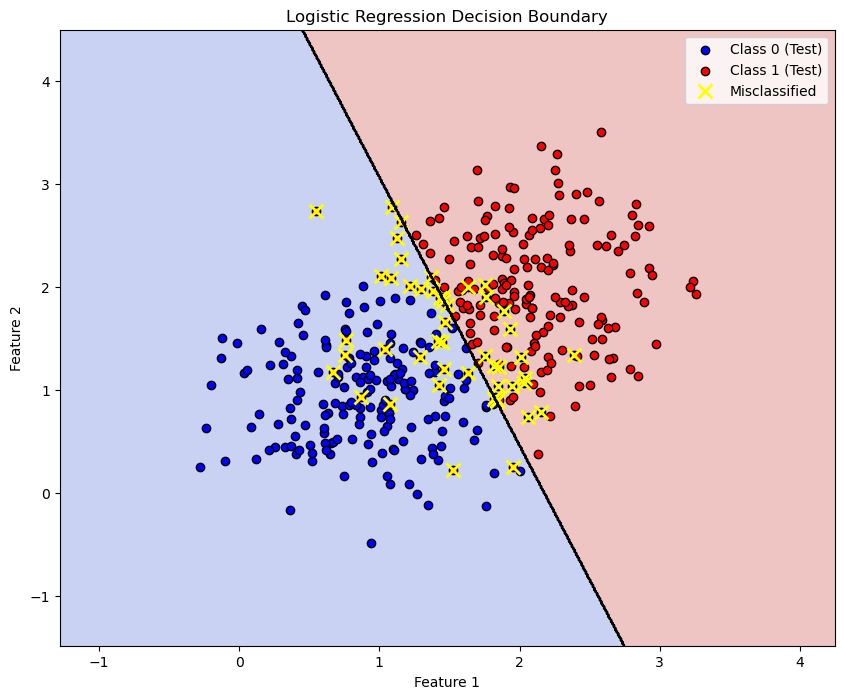

Accuracy: 87.50%
Logistic Regression Accuracy with outliers: 87.50%
Least Squares Accuracy with outliers: 83.75%


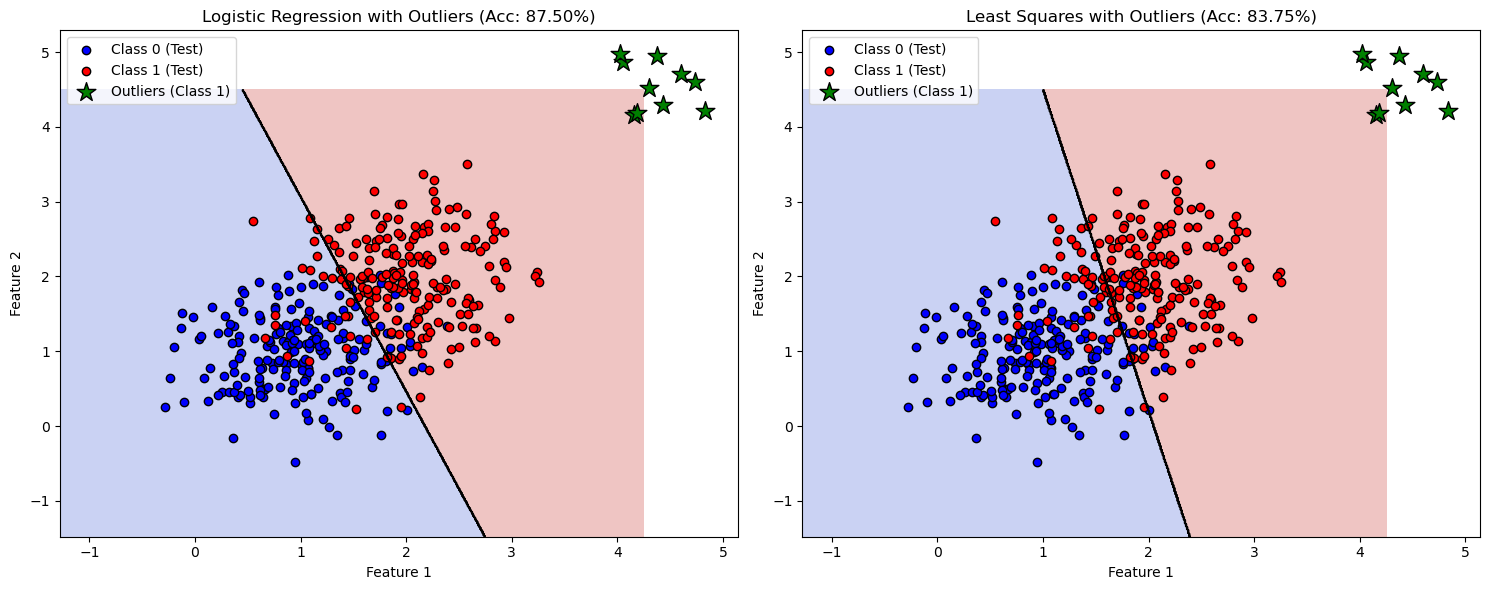

In [23]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1, 1]            #Mean of class1
mean2 = [2, 2]            #Mean of class2
cov = [[0.3, 0], [0, 0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)             #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))               #Combine class1 training and class2 training data to get total training data
tr_targets = np.hstack((np.zeros(50), np.ones(50)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)             #Class2 testing data
te_data = np.vstack((class1_te, class2_te))               #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.hstack((np.zeros(200), np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 100  #max number of ierations for parameter update
  threshold = 0.5 #threshold for classification
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))          #Data. Append ones to the training data to take care of the bias
  w = np.zeros(X.shape[1])          #Initialize the weight vector
  
  for iter in range(0, max_iter, 1):
    z = X @ w
    preds = 1 / (1 + np.exp(-z))    #Predictions on X. Sigmoid(w^T.x)
    error = preds - Y_train    #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    gradient = X.T @ error
    
    # Compute the Hessian matrix (for iterative reweighted least squares)
    R = np.diag(preds * (1 - preds))
    hessian = X.T @ R @ X
    
    #Update the weight vector
    try:
        w = w - np.linalg.solve(hessian, gradient)
    except np.linalg.LinAlgError:
        # If Hessian is singular, use a small regularization term
        w = w - np.linalg.solve(hessian + 1e-5 * np.eye(X.shape[1]), gradient)
    
    # Check for convergence
    if np.linalg.norm(gradient) < 1e-5:
        break

  #Test data predictions
  X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds_prob = 1 / (1 + np.exp(-X_test_aug @ w))
  
  #Compare the predictions with threshold, to output the decision
  test_preds = (test_preds_prob >= threshold).astype(int)

  #Return the predicted test labels
  return test_preds


Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy

  #Compute and return the accuracy
  acc = np.mean(Y_test == Y_pred) * 100
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
def plot_decision_regions(X_train, Y_train, X_test, Y_test):
    # Get the predictions for test data
    Y_pred = Logistic_Regression(X_train, Y_train, X_test)
    
    # Create a meshgrid to visualize decision boundary
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Get predictions for all points in the meshgrid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_pred = Logistic_Regression(X_train, Y_train, mesh_points)
    mesh_pred = mesh_pred.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, mesh_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, mesh_pred, colors='k', linewidths=1)
    
    # Plot the test data
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], 
                c='blue', marker='o', edgecolors='k', label='Class 0 (Test)')
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], 
                c='red', marker='o', edgecolors='k', label='Class 1 (Test)')
    
    # Highlight misclassified points
    misclassified = Y_pred != Y_test
    plt.scatter(X_test[misclassified][:, 0], X_test[misclassified][:, 1], 
                c='yellow', marker='x', s=100, linewidths=2, label='Misclassified')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()
    
    # Return accuracy
    acc = LR_Accuracy(Y_test, Y_pred)
    print(f"Accuracy: {acc:.2f}%")

# Plot the decision regions
plot_decision_regions(tr_data, tr_targets, te_data, te_targets)


##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################
def LS_Classify(X_train, Y_train, X_test):
    """Least Squares Classification"""
    # Add bias term
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    # Compute weights using normal equation
    try:
        w = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train
    except np.linalg.LinAlgError:
        # Add regularization if matrix is singular
        w = np.linalg.inv(X_train_bias.T @ X_train_bias + 1e-5 * np.eye(X_train_bias.shape[1])) @ X_train_bias.T @ Y_train
    
    # Compute predictions
    y_pred = X_test_bias @ w
    
    # Convert to binary predictions
    predictions = np.zeros(len(y_pred))
    predictions[y_pred >= 0.5] = 1
    
    return predictions

def LS_Accuracy(Y_test, Y_pred):
    """Compute accuracy for Least Squares"""
    return np.mean(Y_test == Y_pred) * 100

def compare_classifiers_with_outliers():
    # Create dataset with outliers
    np.random.seed(42)  # For reproducibility
    outliers = np.random.uniform(low=[4, 4], high=[5, 5], size=(10, 2))
    tr_data_with_outliers = np.vstack((tr_data, outliers))
    tr_targets_with_outliers = np.hstack((tr_targets, np.ones(10)))  # Assign outliers to class 1
    
    # Apply logistic regression to data with outliers
    Y_pred_lr = Logistic_Regression(tr_data_with_outliers, tr_targets_with_outliers, te_data)
    acc_lr = LR_Accuracy(te_targets, Y_pred_lr)
    
    # Apply least squares to data with outliers
    Y_pred_ls = LS_Classify(tr_data_with_outliers, tr_targets_with_outliers, te_data)
    acc_ls = LS_Accuracy(te_targets, Y_pred_ls)
    
    # Print accuracies
    print(f"Logistic Regression Accuracy with outliers: {acc_lr:.2f}%")
    print(f"Least Squares Accuracy with outliers: {acc_ls:.2f}%")
    
    # Create meshgrid for visualization
    x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
    y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions for the mesh
    mesh_pred_lr = Logistic_Regression(tr_data_with_outliers, tr_targets_with_outliers, mesh_points)
    mesh_pred_lr = mesh_pred_lr.reshape(xx.shape)
    
    mesh_pred_ls = LS_Classify(tr_data_with_outliers, tr_targets_with_outliers, mesh_points)
    mesh_pred_ls = mesh_pred_ls.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.figure(figsize=(15, 6))
    
    # Plot for Logistic Regression
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, mesh_pred_lr, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, mesh_pred_lr, colors='k', linewidths=1)
    
    # Plot the test data
    plt.scatter(te_data[te_targets == 0][:, 0], te_data[te_targets == 0][:, 1], 
                c='blue', marker='o', edgecolors='k', label='Class 0 (Test)')
    plt.scatter(te_data[te_targets == 1][:, 0], te_data[te_targets == 1][:, 1], 
                c='red', marker='o', edgecolors='k', label='Class 1 (Test)')
    
    # Plot the outliers
    plt.scatter(outliers[:, 0], outliers[:, 1], 
                c='green', marker='*', s=200, edgecolors='k', label='Outliers (Class 1)')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Logistic Regression with Outliers (Acc: {acc_lr:.2f}%)')
    plt.legend()
    
    # Plot for Least Squares
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, mesh_pred_ls, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, mesh_pred_ls, colors='k', linewidths=1)
    
    # Plot the test data
    plt.scatter(te_data[te_targets == 0][:, 0], te_data[te_targets == 0][:, 1], 
                c='blue', marker='o', edgecolors='k', label='Class 0 (Test)')
    plt.scatter(te_data[te_targets == 1][:, 0], te_data[te_targets == 1][:, 1], 
                c='red', marker='o', edgecolors='k', label='Class 1 (Test)')
    
    # Plot the outliers
    plt.scatter(outliers[:, 0], outliers[:, 1], 
                c='green', marker='*', s=200, edgecolors='k', label='Outliers (Class 1)')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Least Squares with Outliers (Acc: {acc_ls:.2f}%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Compare logistic regression and least squares with outliers
compare_classifiers_with_outliers()

Observations
1. Logistic regression handles outliers better than least squares approach.
2. IRLS algorithm is better in convergence.
3. Need to add regularization term to the hessian matrix

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


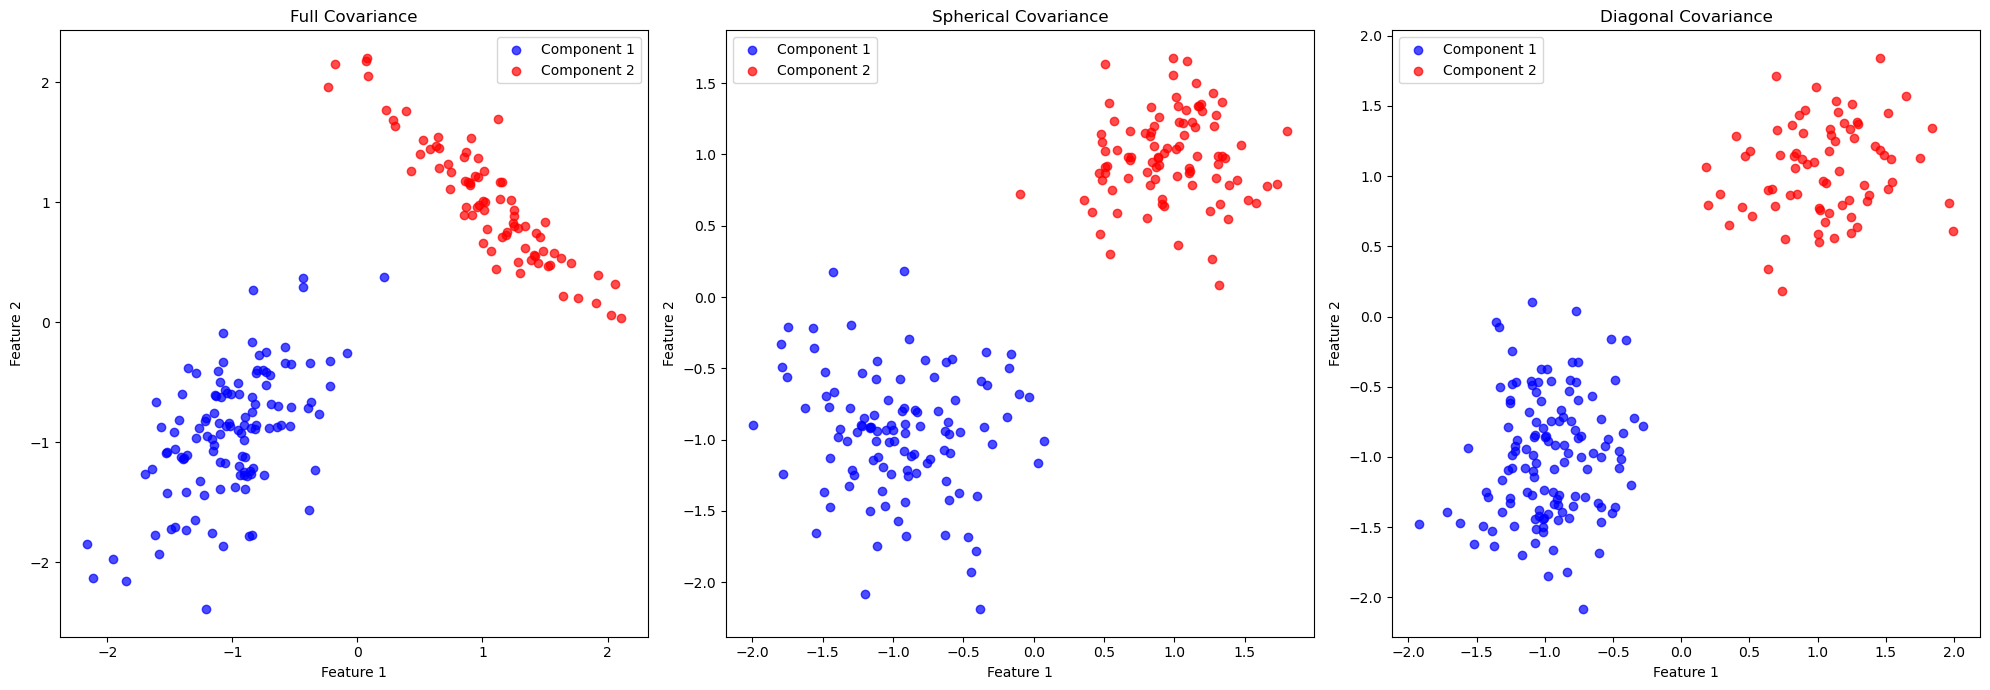

In [24]:
def generateData(pi, mu, sigma, N):
    """
    Generate data from a Gaussian Mixture Model
    
    Parameters:
    pi (list): Weights of Gaussians
    mu (list): Mean vectors of Gaussians 
    sigma (list): Covariance matrices of Gaussians
    N (int): Number of data points to generate
    
    Returns:
    data: Generated data points
    labels: Corresponding component labels
    """
    data = []
    labels = []
    
    # Generate N data points
    for i in range(N):
        # 1. Select the Gaussian component following the probability distribution pi
        component = np.random.choice(len(pi), p=pi)
        
        # 2. Sample the data point from the selected Gaussian
        sample = np.random.multivariate_normal(mu[component], sigma[component])
        
        # 3. Store the data point and its component label
        data.append(sample)
        labels.append(component)
    
    return np.array(data), np.array(labels)

# Define the parameters as given in the assignment
mu1 = np.array([-1.0, -1.0])  # Mean vector of component 1
mu2 = np.array([1.0, 1.0])    # Mean vector of component 2

# Full covariance matrices
sig1 = np.array([[0.15, 0.1], [0.1, 0.25]])      # Full covariance matrix for component 1
sig2 = np.array([[0.3, -0.25], [-0.25, 0.25]])   # Full covariance matrix for component 2

# Spherical covariance matrices
sig1_s = np.array([[0.2, 0.0], [0.0, 0.2]])      # Spherical covariance for component 1
sig2_s = np.array([[0.1, 0.0], [0.0, 0.1]])      # Spherical covariance for component 2

# Diagonal covariance matrices
sig1_d = np.array([[0.1, 0.0], [0.0, 0.2]])      # Diagonal covariance for component 1
sig2_d = np.array([[0.2, 0.0], [0.0, 0.1]])      # Diagonal covariance for component 2

# Mixture weights (prior probabilities)
pi = np.array([0.6, 0.4])      # 60% for component 1, 40% for component 2

# Number of data points to generate
n_points = 200

# Generate data for each covariance type
data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

# Create figure with 3 subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[labels_full == 0, 0], data_full[labels_full == 0, 1], 
            color='blue', alpha=0.7, label='Component 1')
ax[0].scatter(data_full[labels_full == 1, 0], data_full[labels_full == 1, 1], 
            color='red', alpha=0.7, label='Component 2')
ax[0].set_title('Full Covariance')
ax[0].legend()
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[labels_sp == 0, 0], data_sp[labels_sp == 0, 1], 
            color='blue', alpha=0.7, label='Component 1')
ax[1].scatter(data_sp[labels_sp == 1, 0], data_sp[labels_sp == 1, 1], 
            color='red', alpha=0.7, label='Component 2')
ax[1].set_title('Spherical Covariance')
ax[1].legend()
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[labels_dg == 0, 0], data_dg[labels_dg == 0, 1], 
            color='blue', alpha=0.7, label='Component 1')
ax[2].scatter(data_dg[labels_dg == 1, 0], data_dg[labels_dg == 1, 1], 
            color='red', alpha=0.7, label='Component 2')
ax[2].set_title('Diagonal Covariance')
ax[2].legend()
ax[2].set_xlabel('Feature 1')
ax[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

Iteration 1, Log-Likelihood: -1115.5722


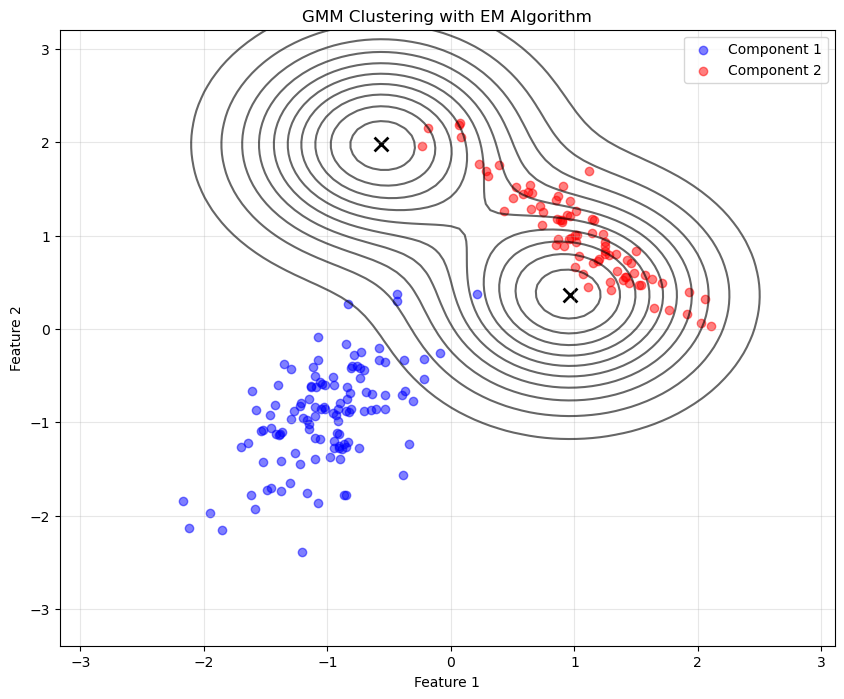

Iteration 2, Log-Likelihood: -490.5815


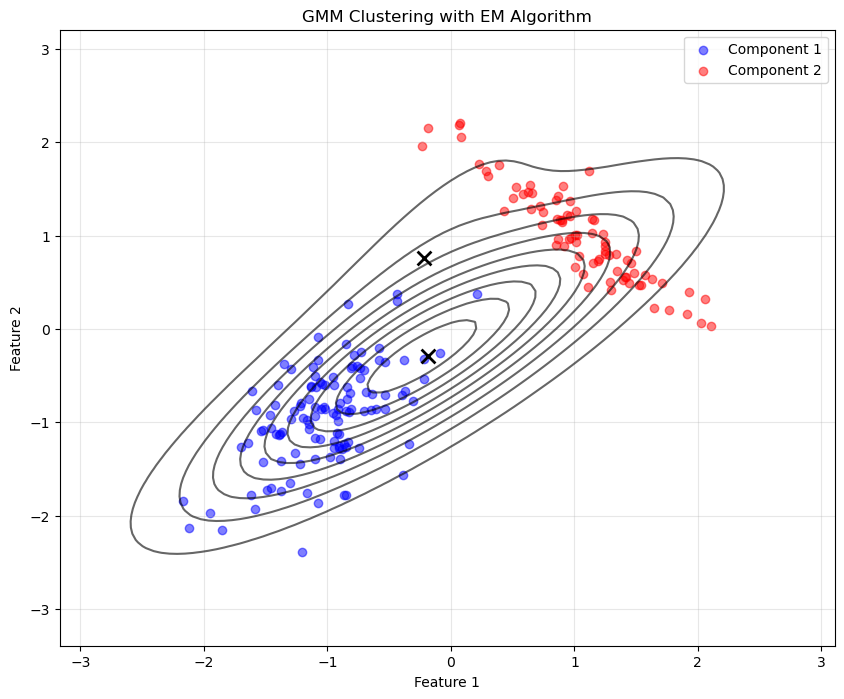

Iteration 3, Log-Likelihood: -489.6084


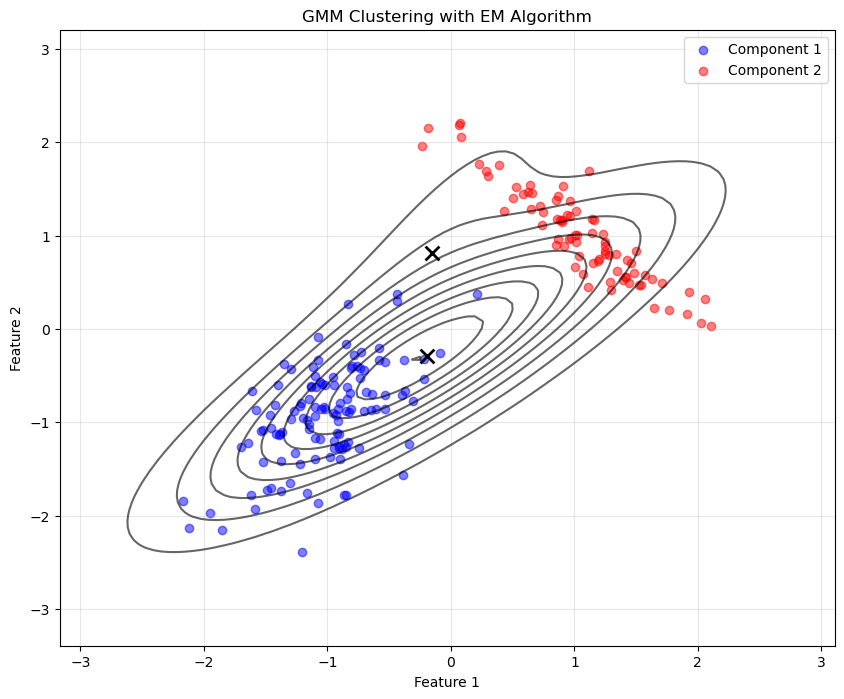

Iteration 4, Log-Likelihood: -489.4429


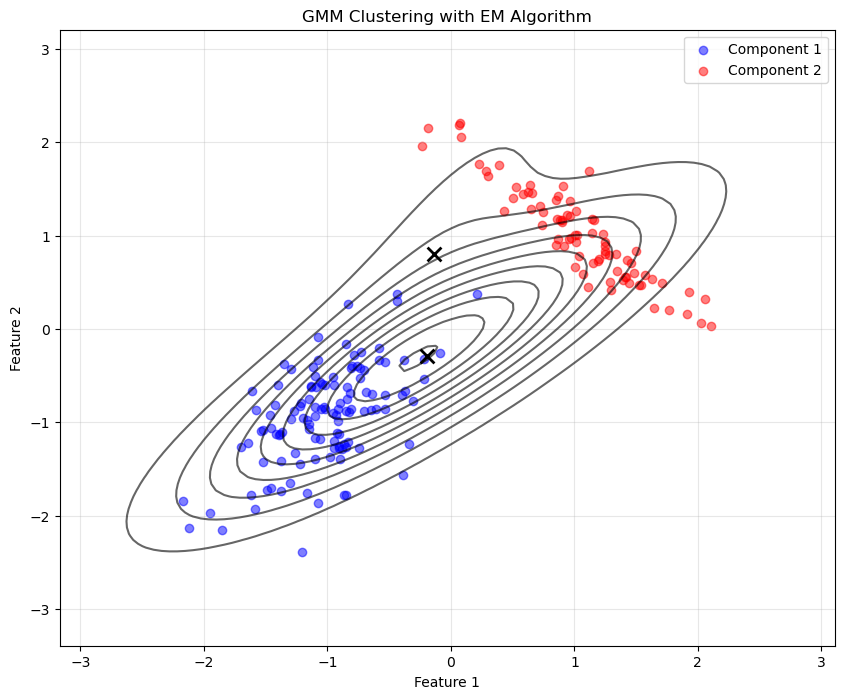

Iteration 5, Log-Likelihood: -489.3792


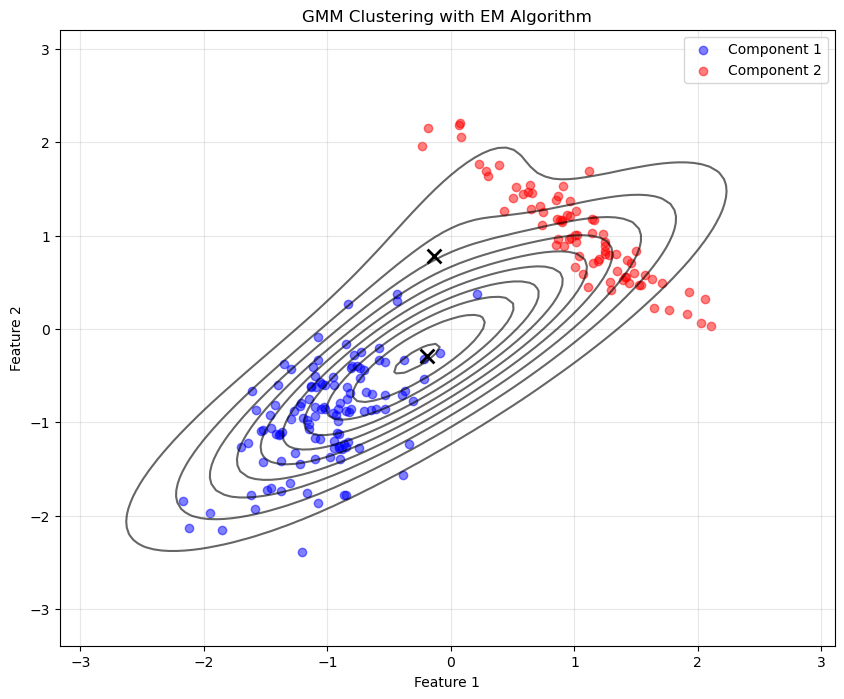

Iteration 6, Log-Likelihood: -489.3287


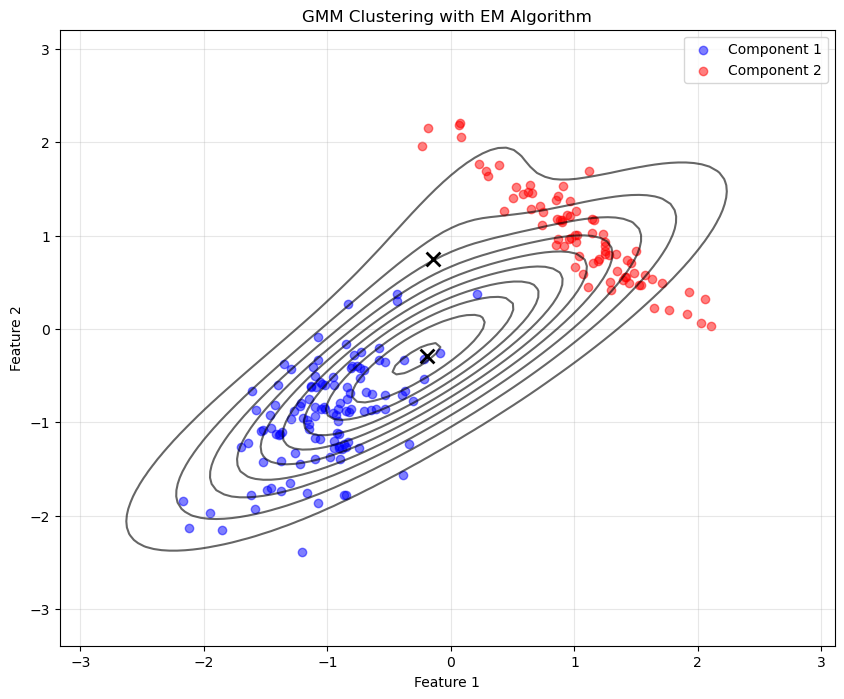

Iteration 7, Log-Likelihood: -489.2689


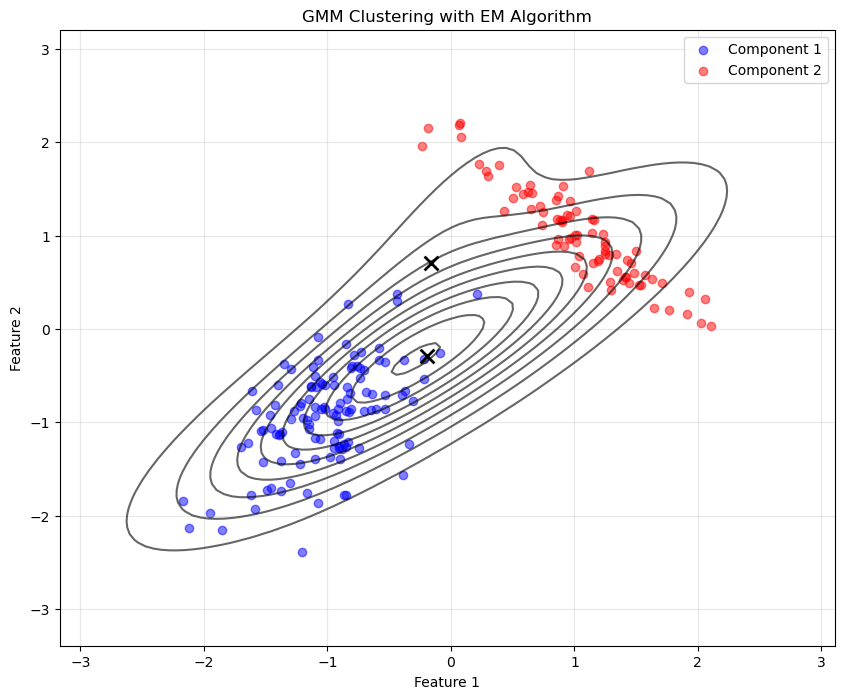

Iteration 8, Log-Likelihood: -489.1881


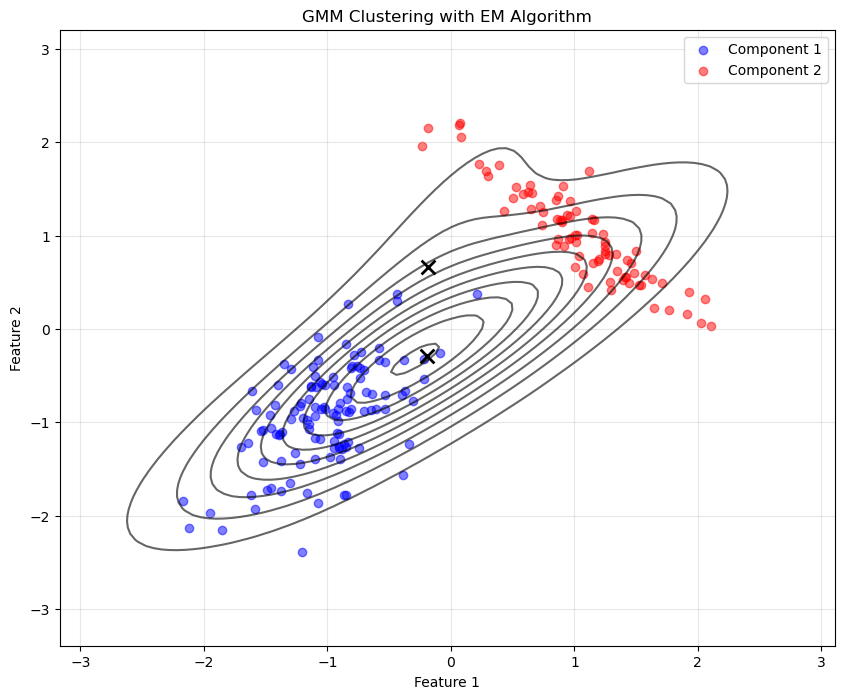

Iteration 9, Log-Likelihood: -489.0769


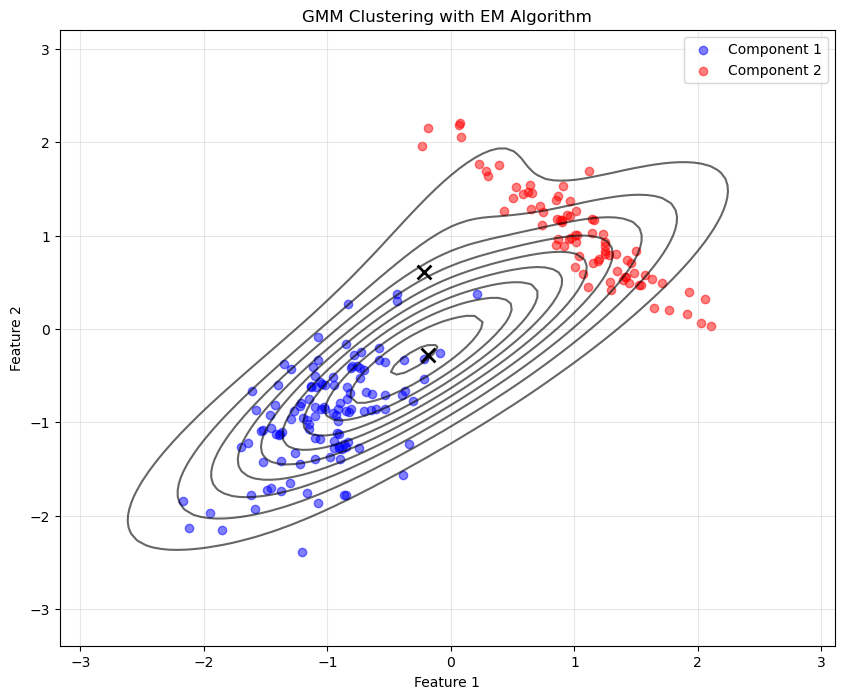

Iteration 10, Log-Likelihood: -488.9266


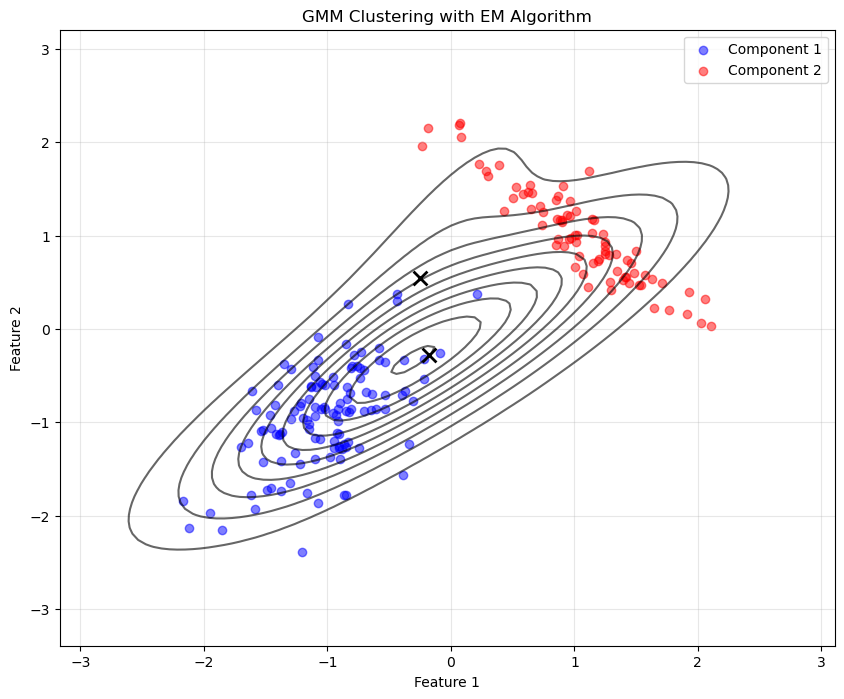

Iteration 11, Log-Likelihood: -488.7292


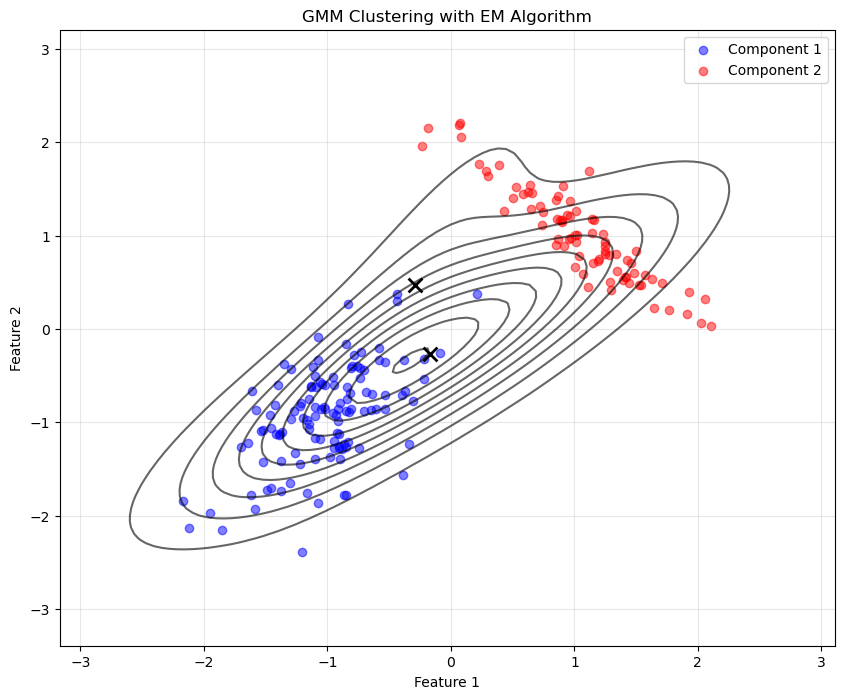

Iteration 12, Log-Likelihood: -488.4773


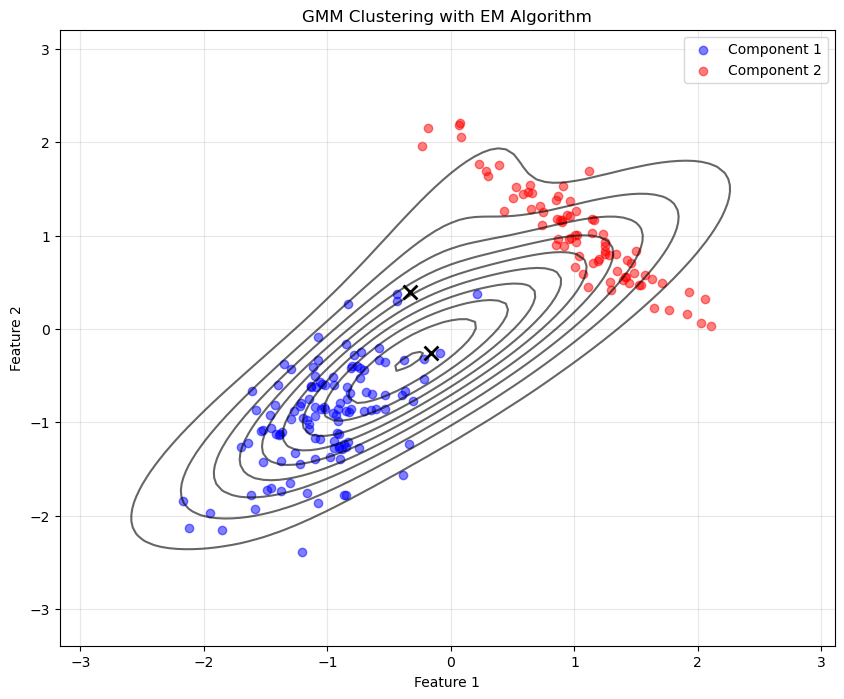

Iteration 13, Log-Likelihood: -488.1625


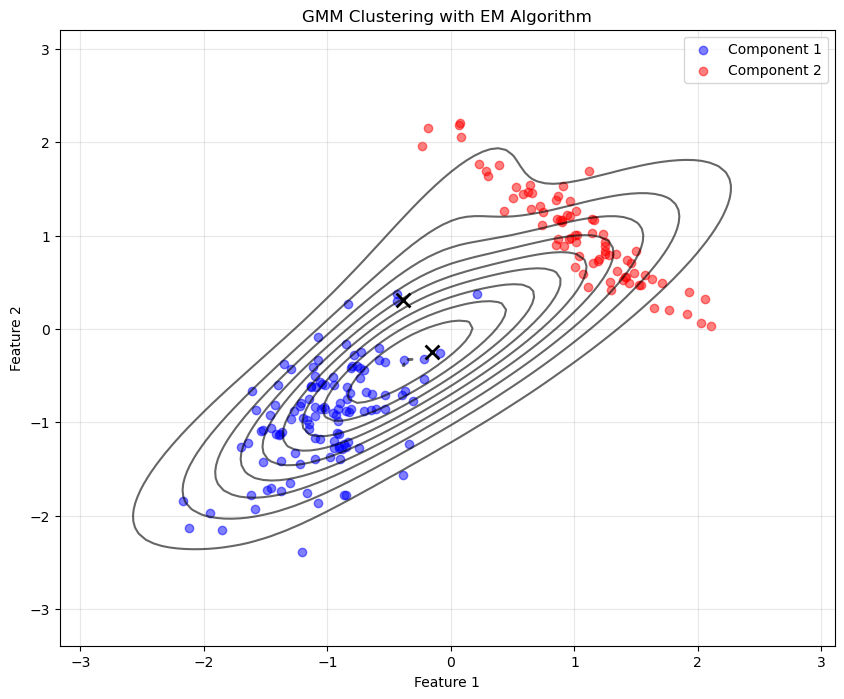

Iteration 14, Log-Likelihood: -487.7735


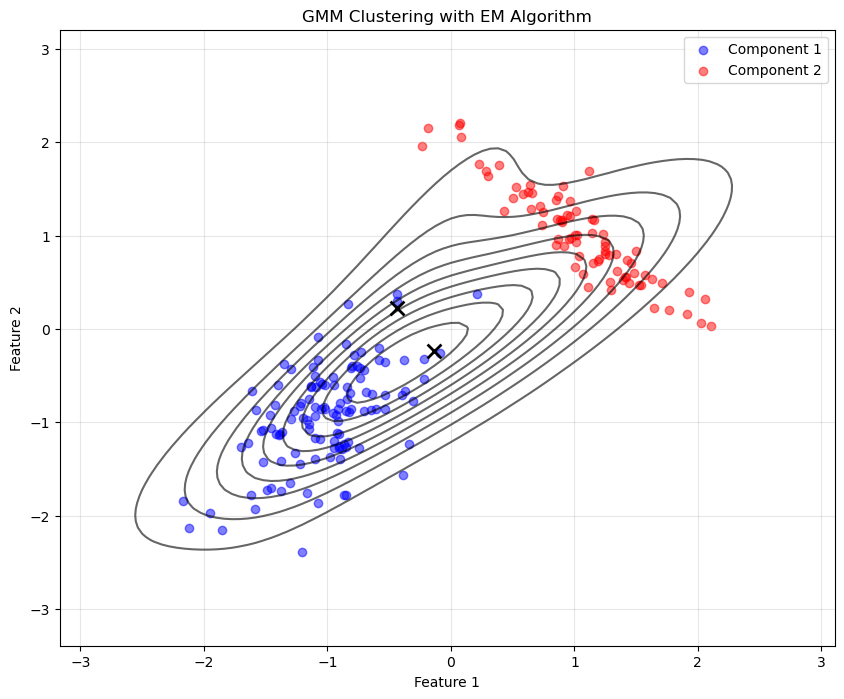

Iteration 15, Log-Likelihood: -487.2933


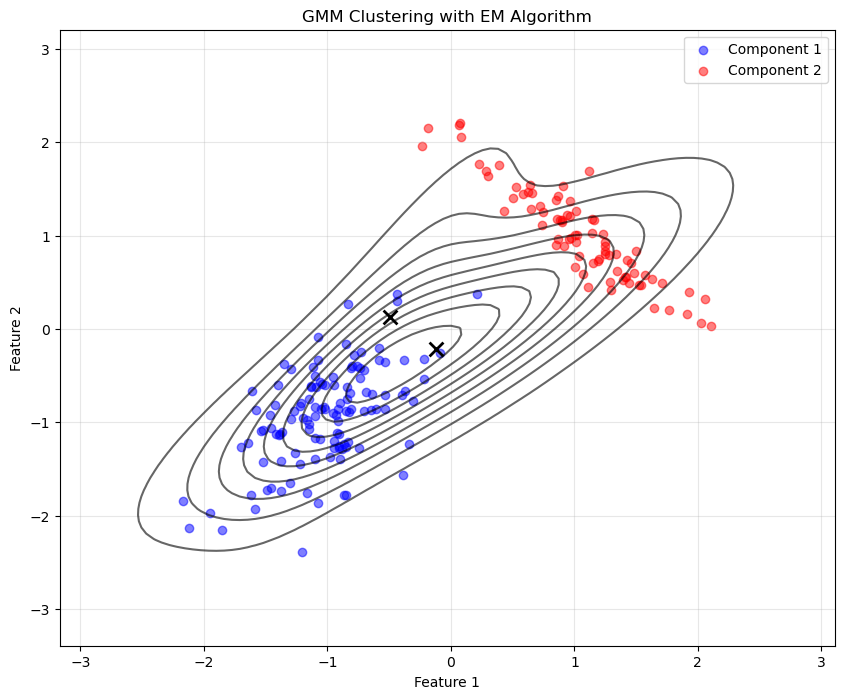

Iteration 16, Log-Likelihood: -486.6969


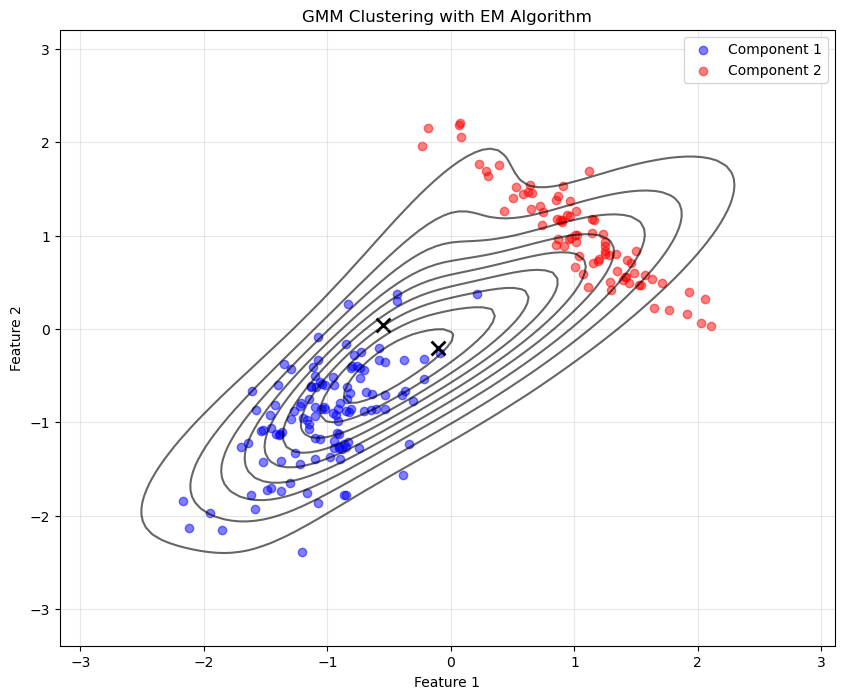

Iteration 17, Log-Likelihood: -485.9495


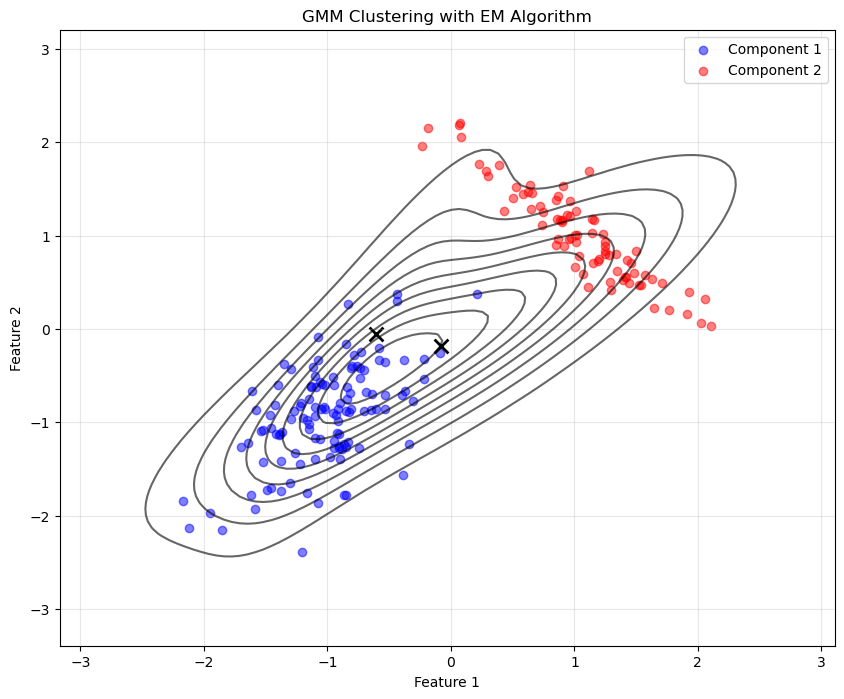

Iteration 18, Log-Likelihood: -485.0069


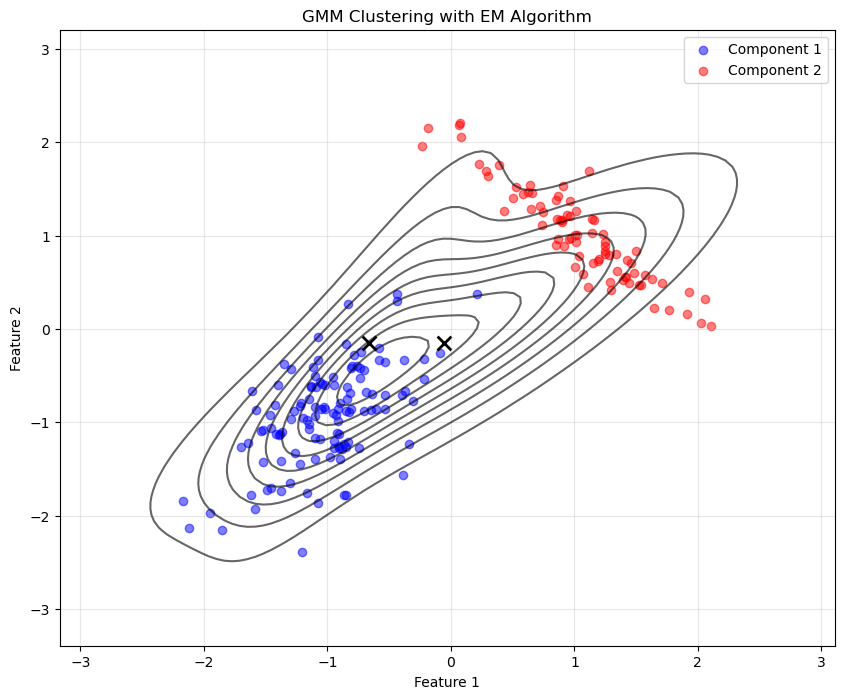

Iteration 19, Log-Likelihood: -483.8191


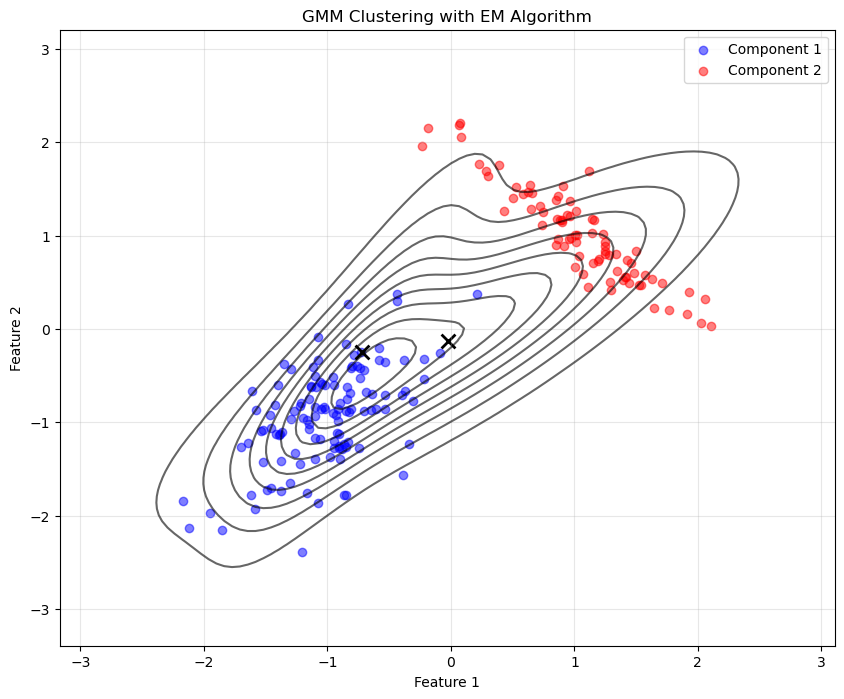

Iteration 20, Log-Likelihood: -482.3442


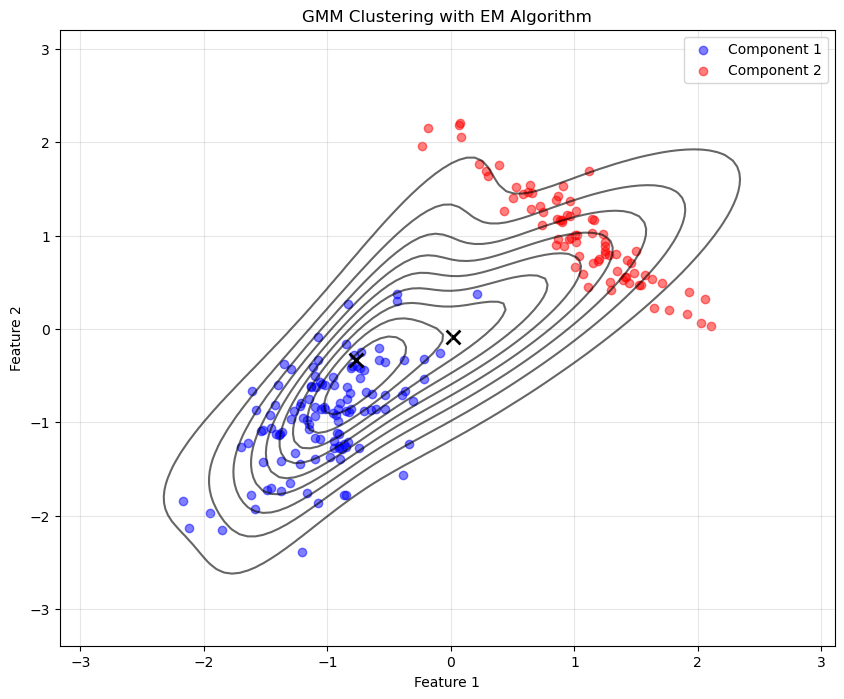

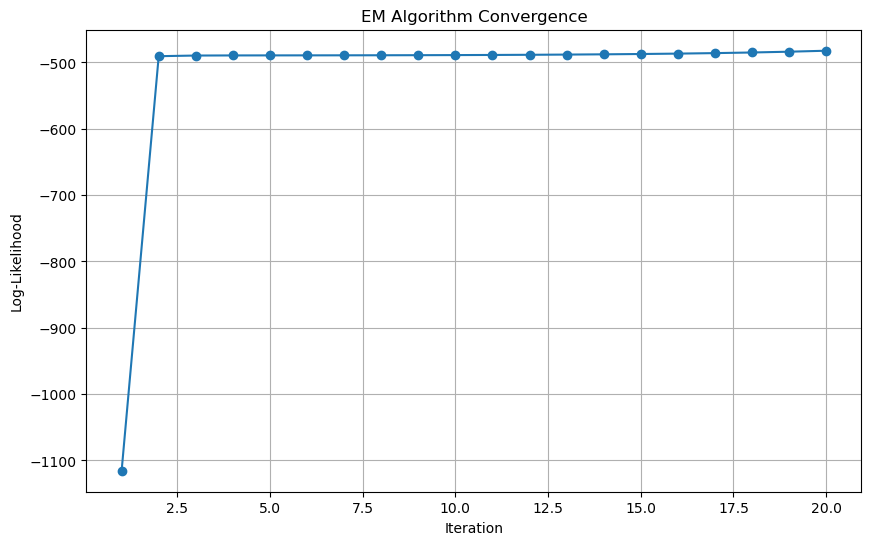


Final GMM parameters:
Component 1:
  Weight (π): 0.2819
  Mean (μ): [-0.81862205 -0.41906682]
  Covariance (Σ):
[[0.331297   0.59997805]
 [0.59997805 1.44710038]]
Component 2:
  Weight (π): 0.7181
  Mean (μ): [ 0.05720637 -0.04944302]
  Covariance (Σ):
[[1.34022781 0.97391272]
 [0.97391272 1.01346173]]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal_pdf(x, mean, cov):
    """
    Calculate the probability density function of a multivariate normal distribution
    """
    D = mean.shape[0]
    x_centered = x - mean
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    
    # Calculate the exponent: -0.5 * (x-μ)ᵀ Σ⁻¹ (x-μ)
    exponent = -0.5 * np.dot(np.dot(x_centered, inv_cov), x_centered)
    
    # Calculate PDF: (2π)^(-D/2) * |Σ|^(-1/2) * exp(-0.5 * (x-μ)ᵀ Σ⁻¹ (x-μ))
    normalization = (2 * np.pi) ** (-D/2) * np.sqrt(np.abs(1.0 / det_cov))
    return normalization * np.exp(exponent)

def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    """
    Compute the likelihood of the data given the parameters
    
    Parameters:
    data: Input data points (N x D array)
    pi: Mixture weights (M length array)
    mu: Mean vectors (M x D array)
    sigma: Covariance matrices (M x D x D array)
    log_likelihood: If True, return log likelihood
    likelihoods: If True, return individual likelihoods for each data point
    
    Returns:
    Likelihood or log likelihood
    """
    N = len(data)
    M = len(pi)
    likelihoods_array = np.zeros(N)
    
    for n in range(N):
        likelihood_n = 0
        for k in range(M):
            # Calculate probability using multivariate normal PDF
            likelihood_n += pi[k] * multivariate_normal_pdf(data[n], mu[k], sigma[k])
        likelihoods_array[n] = likelihood_n
    
    if likelihoods:
        return likelihoods_array
    
    if log_likelihood:
        # Sum of log likelihoods - protect against numerical underflow
        return np.sum(np.log(likelihoods_array))
    else:
        # Product of likelihoods (not recommended due to numerical issues)
        return np.prod(likelihoods_array)

def expectation(data, pi, mu, sigma):
    """
    Expectation step: Calculate responsibilities
    
    Parameters:
    data: Input data points (N x D array)
    pi: Mixture weights (M length array)
    mu: Mean vectors (M x D array)
    sigma: Covariance matrices (M x D x D array)
    
    Returns:
    gamma: Responsibilities (N x M array)
    """
    N = len(data)
    M = len(pi)
    gamma = np.zeros((N, M))
    
    for n in range(N):
        # Iterate through the data points
        for k in range(M):
            # Calculate the numerator: π_k * N(x_n | μ_k, Σ_k)
            numerator = pi[k] * multivariate_normal_pdf(data[n], mu[k], sigma[k])
            
            # Calculate the denominator: sum of all components
            denominator = 0
            for j in range(M):
                denominator += pi[j] * multivariate_normal_pdf(data[n], mu[j], sigma[j])
            
            # Calculate responsibility (γ_nk)
            if denominator > 0:  # Prevent division by zero
                gamma[n, k] = numerator / denominator
            else:
                gamma[n, k] = 0
    
    return gamma

def maximization(data, gamma):
    """
    Maximization step: Update parameters based on responsibilities
    
    Parameters:
    data: Input data points (N x D array)
    gamma: Responsibilities (N x M array)
    
    Returns:
    pi: Updated mixture weights
    mu: Updated mean vectors
    sigma: Updated covariance matrices
    """
    N, M = gamma.shape
    D = data.shape[1]
    
    # Initialize arrays for updated parameters
    pi = np.zeros(M)
    mu = np.zeros((M, D))
    sigma = np.zeros((M, D, D))
    
    for k in range(M):
        # Calculate Nk: sum of responsibilities for component k
        N_k = np.sum(gamma[:, k])
        
        # Update pi (weights)
        pi[k] = N_k / N
        
        # Update mu (means)
        if N_k > 0:  # Prevent division by zero
            mu[k] = np.sum(gamma[:, k, np.newaxis] * data, axis=0) / N_k
            
            # Update sigma (covariances)
            sigma_k = np.zeros((D, D))
            for n in range(N):
                x_diff = (data[n] - mu[k]).reshape(-1, 1)  # Column vector
                sigma_k += gamma[n, k] * (x_diff @ x_diff.T)
            
            sigma[k] = sigma_k / N_k
            
            # Add a small regularization to ensure positive definiteness
            sigma[k] += 1e-6 * np.eye(D)
    
    return pi, mu, sigma

def plot_contours(data, labels, pi, mu, sigma):
    """
    Plot the data points and contours of the estimated distributions
    
    Parameters:
    data: Input data points
    labels: True cluster assignments (if available)
    pi: Mixture weights
    mu: Mean vectors
    sigma: Covariance matrices
    """
    plt.figure(figsize=(10, 8))
    
    # Plot the data points with true labels (if available)
    if labels is not None:
        unique_labels = np.unique(labels)
        colors = ['blue', 'red', 'green', 'purple', 'orange']
        
        for i, label in enumerate(unique_labels):
            color = colors[i % len(colors)]
            plt.scatter(data[labels == label, 0], data[labels == label, 1], 
                       color=color, alpha=0.5, label=f'Component {label+1}')
    else:
        plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    
    # Create a mesh grid for contour plotting
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Calculate GMM probability density for each point in the mesh
    Z = np.zeros(len(mesh_points))
    for k in range(len(pi)):
        Z += pi[k] * np.array([multivariate_normal_pdf(point, mu[k], sigma[k]) for point in mesh_points])
    Z = Z.reshape(xx.shape)
    
    # Plot contours
    plt.contour(xx, yy, Z, levels=10, colors='black', alpha=0.6)
    
    # Plot the estimated means
    for k in range(len(mu)):
        plt.scatter(mu[k, 0], mu[k, 1], c='black', marker='x', s=100, linewidths=2)
    
    plt.title('GMM Clustering with EM Algorithm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Select the dataset to run the EM algorithm on
data = data_full     # Data to run EM algorithm on
labels = labels_full  # True component labels
N = len(data)        # Number of data points
D = data.shape[1]    # Data dimension (2 in this case)
M = 2                # Number of components in GMM

# Initialize the GMM parameters
# Random initialization (or you could use k-means initialization)
np.random.seed(42)  # For reproducibility
pi = np.ones(M) / M  # Equal weights: [0.5, 0.5]

# Initialize means randomly within data range
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
mu = np.random.uniform(min_vals, max_vals, size=(M, D))

# Initialize covariance matrices as identity matrices with some scaling
sigma = np.array([np.eye(D) * 0.5 for _ in range(M)])

# Store log-likelihoods to monitor convergence
log_likelihoods = []

# Number of steps to run EM algorithm
nsteps = 20

# Run EM algorithm
for index in range(nsteps):
    # Compute the likelihood
    # Calculate log-likelihood using our own implementation of multivariate_normal pdf
    N = len(data)
    M = len(pi)
    log_likelihood = 0
    
    for n in range(N):
        likelihood_n = 0
        for k in range(M):
            likelihood_n += pi[k] * multivariate_normal_pdf(data[n], mu[k], sigma[k])
        
        log_likelihood += np.log(likelihood_n)
    
    ll = log_likelihood
    log_likelihoods.append(ll)
    print(f"Iteration {index+1}, Log-Likelihood: {ll:.4f}")
    
    # Plot the contours
    plot_contours(data, labels, pi, mu, sigma)
    
    # Expectation step
    gamma = expectation(data, pi, mu, sigma)
    
    # Maximization step
    pi, mu, sigma = maximization(data, gamma)

# Plot the log-likelihood progression
plt.figure(figsize=(10, 6))
plt.plot(range(1, nsteps+1), log_likelihoods, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('EM Algorithm Convergence')
plt.grid(True)
plt.show()

# Final parameter estimates
print("\nFinal GMM parameters:")
for k in range(M):
    print(f"Component {k+1}:")
    print(f"  Weight (π): {pi[k]:.4f}")
    print(f"  Mean (μ): {mu[k]}")
    print(f"  Covariance (Σ):\n{sigma[k]}")


Running EM with different initializations on full covariance dataset:


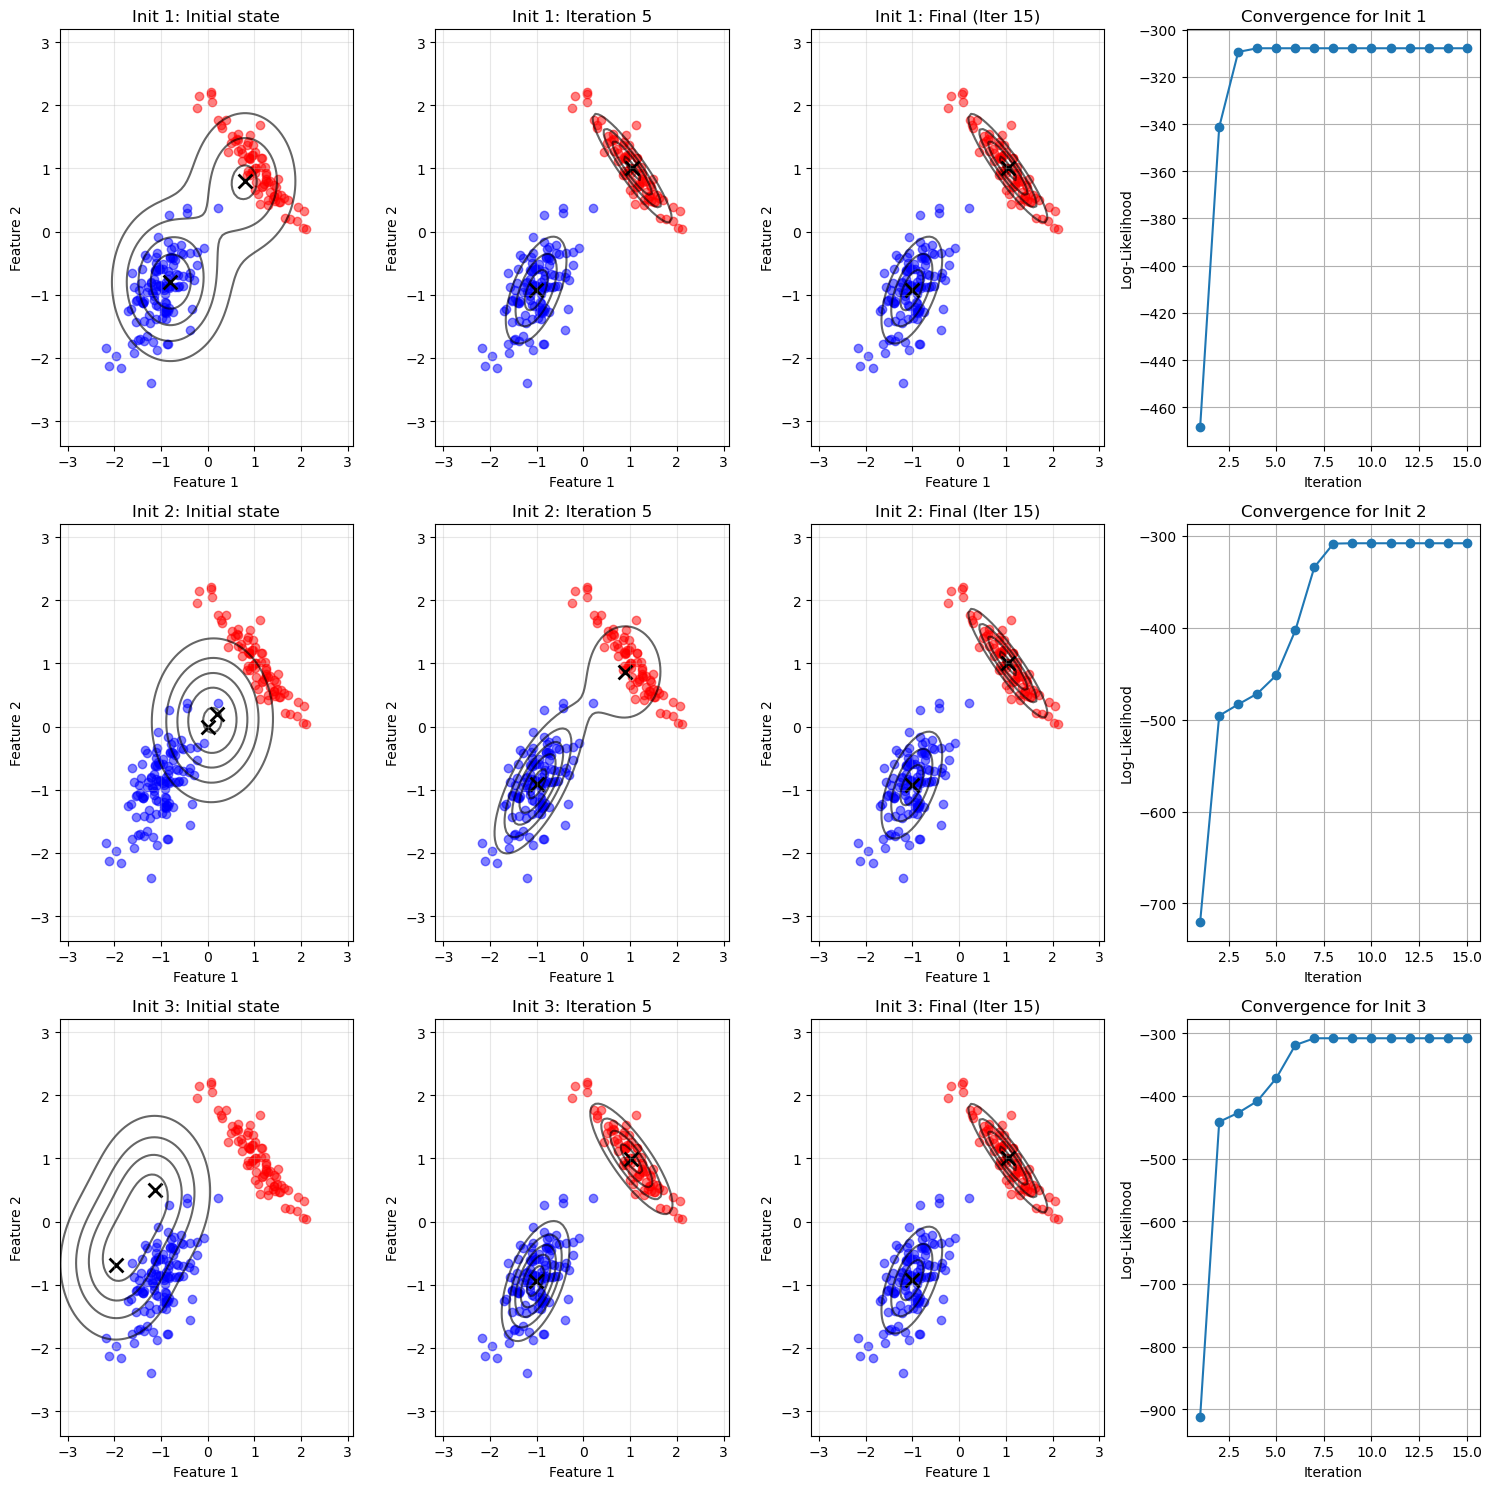

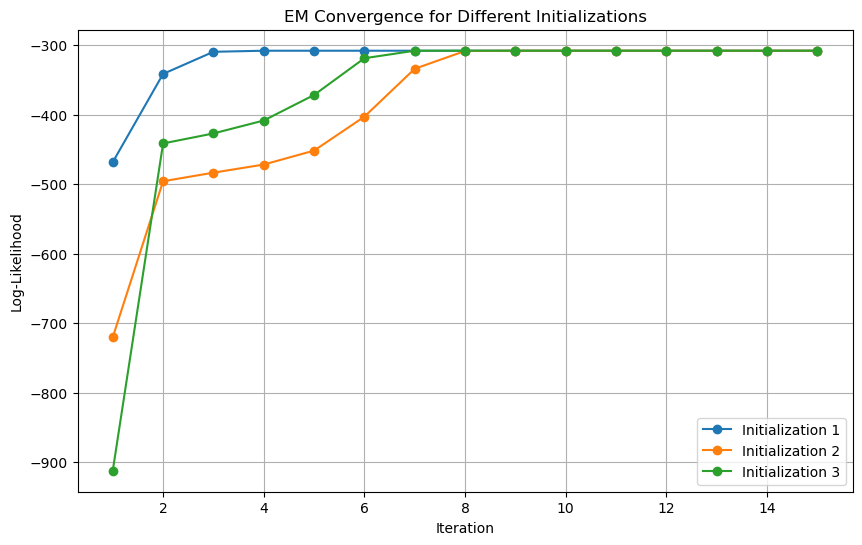


Comparison of Final Results:

Initialization 1:
  Final Log-Likelihood: -307.9363
  Mixture Weights (π): [0.60000434 0.39999566]
  Mean Vectors (μ):
    Component 1: [-1.01211412 -0.92607246]
    Component 2: [1.04394168 1.00501806]

Initialization 2:
  Final Log-Likelihood: -307.9363
  Mixture Weights (π): [0.60000434 0.39999566]
  Mean Vectors (μ):
    Component 1: [-1.01211412 -0.92607246]
    Component 2: [1.04394168 1.00501806]

Initialization 3:
  Final Log-Likelihood: -307.9363
  Mixture Weights (π): [0.60000434 0.39999566]
  Mean Vectors (μ):
    Component 1: [-1.01211412 -0.92607246]
    Component 2: [1.04394168 1.00501806]

Comparing EM performance with different covariance types:

Results for Full Covariance:
  Final Log-Likelihood: -307.9363
  Mixture Weights (π): [0.60000434 0.39999566]
  Mean Vectors (μ):
    Component 1: [-1.01211412 -0.92607246]
    Component 2: [1.04394168 1.00501806]
  Covariance Matrices (Σ):
    Component 1:
[[0.16412667 0.12122771]
 [0.12122771 0.

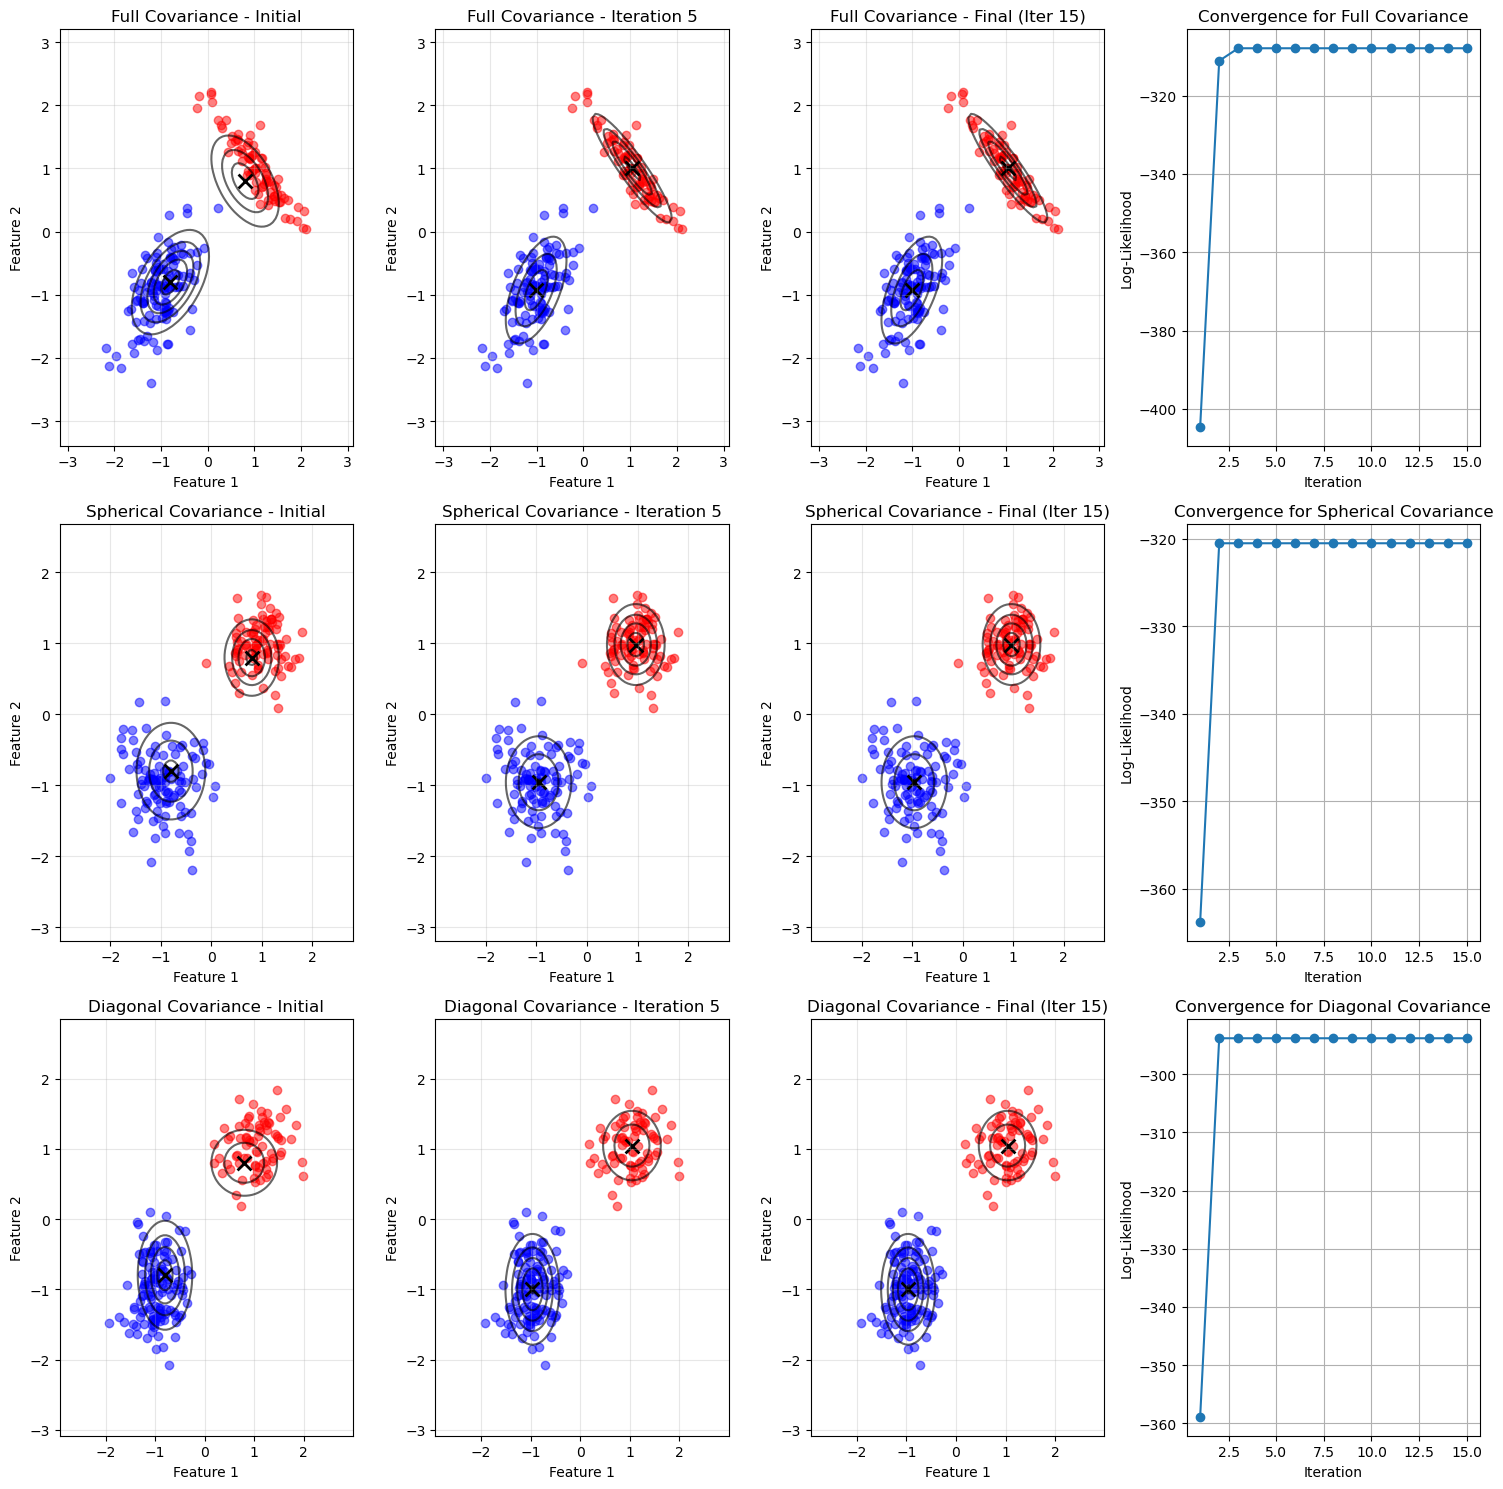

In [26]:
def run_em_with_different_initializations(data, labels, n_initializations=3, max_iter=15):
    """
    Run EM algorithm with different initializations and compare results.
    
    Parameters:
    data: Input data points (N x D array)
    labels: True component labels
    n_initializations: Number of different initializations to try
    max_iter: Maximum number of iterations for each run
    """
    N, D = data.shape
    M = 2  # Number of mixture components
    
    # Store results for each initialization
    all_final_ll = []
    all_final_pi = []
    all_final_mu = []
    all_final_sigma = []
    all_ll_history = []
    
    plt.figure(figsize=(15, 5 * n_initializations))
    
    for init in range(n_initializations):
        np.random.seed(init * 42)  # Different seed for each initialization
        
        # Initialize parameters
        if init == 0:
            # Good initialization (close to true parameters)
            mu = np.array([[-0.8, -0.8], [0.8, 0.8]])
            pi = np.array([0.6, 0.4])
        elif init == 1:
            # Poor initialization (both means initialized similarly)
            mu = np.array([[0.0, 0.0], [0.2, 0.2]])
            pi = np.array([0.5, 0.5])
        else:
            # Random initialization within data range
            min_vals = np.min(data, axis=0)
            max_vals = np.max(data, axis=0)
            mu = np.random.uniform(min_vals, max_vals, size=(M, D))
            pi = np.ones(M) / M
        
        # Initialize covariance matrices as identity matrices with some scaling
        sigma = np.array([np.eye(D) * 0.5 for _ in range(M)])
        
        # Store log-likelihoods to monitor convergence
        log_likelihoods = []
        
        # Plot initial state
        plt.subplot(n_initializations, 4, 4*init + 1)
        plot_contours_simple(data, labels, pi, mu, sigma, 
                         title=f"Init {init+1}: Initial state")
        
        # Run EM algorithm
        for iter in range(max_iter):
            # Compute log-likelihood
            ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
            log_likelihoods.append(ll)
            
            # Expectation step
            gamma = expectation(data, pi, mu, sigma)
            
            # Maximization step
            pi, mu, sigma = maximization(data, gamma)
            
            # Plot middle iteration
            if iter == 4:
                plt.subplot(n_initializations, 4, 4*init + 2)
                plot_contours_simple(data, labels, pi, mu, sigma, 
                                 title=f"Init {init+1}: Iteration {iter+1}")
        
        # Plot final state
        plt.subplot(n_initializations, 4, 4*init + 3)
        plot_contours_simple(data, labels, pi, mu, sigma, 
                         title=f"Init {init+1}: Final (Iter {max_iter})")
        
        # Plot log-likelihood history
        plt.subplot(n_initializations, 4, 4*init + 4)
        plt.plot(range(1, max_iter+1), log_likelihoods, 'o-')
        plt.xlabel('Iteration')
        plt.ylabel('Log-Likelihood')
        plt.title(f'Convergence for Init {init+1}')
        plt.grid(True)
        
        # Store final results
        all_final_ll.append(log_likelihoods[-1])
        all_final_pi.append(pi)
        all_final_mu.append(mu)
        all_final_sigma.append(sigma)
        all_ll_history.append(log_likelihoods)
    
    plt.tight_layout()
    plt.show()
    
    # Compare final log-likelihoods
    plt.figure(figsize=(10, 6))
    for i, ll_history in enumerate(all_ll_history):
        plt.plot(range(1, max_iter+1), ll_history, 'o-', label=f'Initialization {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.title('EM Convergence for Different Initializations')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print final results
    print("\nComparison of Final Results:")
    for i in range(n_initializations):
        print(f"\nInitialization {i+1}:")
        print(f"  Final Log-Likelihood: {all_final_ll[i]:.4f}")
        print(f"  Mixture Weights (π): {all_final_pi[i]}")
        print(f"  Mean Vectors (μ):")
        for k in range(M):
            print(f"    Component {k+1}: {all_final_mu[i][k]}")

# Define a simpler version of plot_contours that doesn't use scipy.stats
def plot_contours_simple(data, labels, pi, mu, sigma, title="GMM Clustering"):
    plt.title(title)
    
    # Plot the data points with true labels
    unique_labels = np.unique(labels)
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    
    for i, label in enumerate(unique_labels):
        color = colors[i % len(colors)]
        plt.scatter(data[labels == label, 0], data[labels == label, 1], 
                   color=color, alpha=0.5, label=f'True Component {label+1}')
    
    # Create a mesh grid for contour plotting
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Calculate GMM probability density for each point in the mesh using our own function
    Z = np.zeros(len(mesh_points))
    for k in range(len(pi)):
        Z += pi[k] * np.array([multivariate_normal_pdf(point, mu[k], sigma[k]) for point in mesh_points])
    Z = Z.reshape(xx.shape)
    
    # Plot contours
    plt.contour(xx, yy, Z, levels=5, colors='black', alpha=0.6)
    
    # Plot the estimated means
    for k in range(len(mu)):
        plt.scatter(mu[k, 0], mu[k, 1], c='black', marker='x', s=100, linewidths=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)

# Run the EM algorithm with different initializations on the full covariance dataset
print("Running EM with different initializations on full covariance dataset:")
run_em_with_different_initializations(data_full, labels_full)

# Function to compare EM performance with different covariance types
def compare_covariance_types(max_iter=15):
    """
    Compare EM algorithm performance with different covariance matrix types
    """
    # Define datasets and their covariance types
    datasets = [
        (data_full, labels_full, "Full Covariance"),
        (data_sp, labels_sp, "Spherical Covariance"),
        (data_dg, labels_dg, "Diagonal Covariance")
    ]
    
    plt.figure(figsize=(15, 15))
    
    for idx, (data, labels, title) in enumerate(datasets):
        N, D = data.shape
        M = 2  # Number of mixture components
        
        # Initialize with reasonable values (rather than random)
        if title == "Full Covariance":
            mu = np.array([[-0.8, -0.8], [0.8, 0.8]])
            sigma = np.array([
                [[0.2, 0.1], [0.1, 0.2]],
                [[0.2, -0.1], [-0.1, 0.2]]
            ])
        elif title == "Spherical Covariance":
            mu = np.array([[-0.8, -0.8], [0.8, 0.8]])
            sigma = np.array([
                [[0.2, 0.0], [0.0, 0.2]],
                [[0.1, 0.0], [0.0, 0.1]]
            ])
        else:  # Diagonal Covariance
            mu = np.array([[-0.8, -0.8], [0.8, 0.8]])
            sigma = np.array([
                [[0.1, 0.0], [0.0, 0.2]],
                [[0.2, 0.0], [0.0, 0.1]]
            ])
        
        pi = np.array([0.6, 0.4])
        
        # Store log-likelihoods
        log_likelihoods = []
        
        # Plot initial state
        plt.subplot(3, 4, 4*idx + 1)
        plot_contours_simple(data, labels, pi, mu, sigma, title=f"{title} - Initial")
        
        # Run EM algorithm
        for iter in range(max_iter):
            # Compute log-likelihood
            ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
            log_likelihoods.append(ll)
            
            # Expectation step
            gamma = expectation(data, pi, mu, sigma)
            
            # Maximization step
            pi, mu, sigma = maximization(data, gamma)
            
            # Enforce the specific covariance structure
            if title == "Spherical Covariance":
                for k in range(M):
                    # Average the diagonal elements to get a scalar
                    avg_var = np.mean(np.diag(sigma[k]))
                    # Create a new spherical covariance matrix
                    sigma[k] = np.eye(D) * avg_var
            elif title == "Diagonal Covariance":
                for k in range(M):
                    # Keep only the diagonal elements
                    sigma[k] = np.diag(np.diag(sigma[k]))
            
            # Plot middle iteration
            if iter == 4:
                plt.subplot(3, 4, 4*idx + 2)
                plot_contours_simple(data, labels, pi, mu, sigma, 
                                  title=f"{title} - Iteration {iter+1}")
                
        # Plot final state
        plt.subplot(3, 4, 4*idx + 3)
        plot_contours_simple(data, labels, pi, mu, sigma, 
                          title=f"{title} - Final (Iter {max_iter})")
        
        # Plot log-likelihood history
        plt.subplot(3, 4, 4*idx + 4)
        plt.plot(range(1, max_iter+1), log_likelihoods, 'o-')
        plt.xlabel('Iteration')
        plt.ylabel('Log-Likelihood')
        plt.title(f'Convergence for {title}')
        plt.grid(True)
        
        # Print final results
        print(f"\nResults for {title}:")
        print(f"  Final Log-Likelihood: {log_likelihoods[-1]:.4f}")
        print(f"  Mixture Weights (π): {pi}")
        print(f"  Mean Vectors (μ):")
        for k in range(M):
            print(f"    Component {k+1}: {mu[k]}")
        print(f"  Covariance Matrices (Σ):")
        for k in range(M):
            print(f"    Component {k+1}:\n{sigma[k]}")
    
    plt.tight_layout()
    plt.show()

# Compare EM performance with different covariance types
print("\nComparing EM performance with different covariance types:")
compare_covariance_types()

<b> Report your observations </b>

1. As iterations increase the log likelihood converges. Most of the convergence occurs in first 4-5 iterations. Initializations near to original solution give faster convergence rates.

2. If the rank of covariance matrix is full, then we get the best fit.

3. I have used 2 Gaussians in the gaussian mixture model.

